COMPLETARE L ES:
- PUTNO 1 RJAGS ANCHE CON LA JEFFREYS PRIOR
- point 2 METTERE COME P RIOR LA  POSTERIOR 

## Exercise 1
-  Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the
Poisson distribution can be very useful in applied statistics when describing low-frequency events
in a large population. In a famous example he showed that the number of deaths by horse kick
among the Prussian army follows the Poisson distribution.
- Considering the following to sets of observations taken over a fixed large time interval in two different
corps:

| **y death soldiers**     | **n1 observations** | **n2 observations** |
|-----------|-----------|--------------|
| 0         | 109       | 144          |
| 1         | 65        | 91           |
| 2         | 22        | 32           |
| 3         | 3         | 11           |
| 4         | 1         | 2            |
| > 5  | 0         | 0            |

(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

Let's consider we have n independent observations, $y_1, y_2, ..., y_n$, from a Poisson distribution with unknown rate parameter $\lambda$. Assuming a Uniform  prior distribution represented by a Gamma function with shape parameter $\alpha$ and rate parameter $\lambda$, the posterior distribution is a Gamma distribution with updated shape parameter $\alpha' = \alpha + \sum_{i=1}^n y_i$ and rate parameter $\lambda' = \lambda + n$.Therefore, the posterior distribution for $\mu$ is:

$$
p(\mu | \{y_i\}) = \frac{\lambda e^{-\lambda \mu}}{\Gamma(\alpha')} \mu^{\alpha' - 1}
$$

with $\alpha' = N+1 = ??$, and $\lambda = ??$. 

The posterior mean and variance are given by:

$$
E[\mu | \{y_i\}] = \frac{\alpha'}{\lambda},              Var[\mu | \{y_i\}] = \frac{\alpha'}{\lambda^2} 
$$

To find the posterior median, we can solve for $P(\mu \leq m | \{y_i\}) = 0.5$, where $m$ is the median.

In [1]:
#install.packages("gridExtra")

In [2]:
library(ggplot2)
library(gridExtra)

# Create vectors for each column
y_ <- c(0, 1, 2, 3, 4, 5)     #set of all the measures (counts) --> {109 volte 0, 65 volte 1,...}
n1_observations <- c(109, 65, 22, 3, 1, 0)  
n2_observations <- c(144, 91, 32, 11, 2, 0)

n1 <- sum(n1_observations)
n2 <- sum(n2_observations)
cat("N1: Total number of observation: ", sum(n1_observations), "Total death soldiers",sum(n1_observations*y_))
cat("\n N2: Total number of observation: ", sum(n2_observations), "Total death soldiers",sum(n2_observations*y_))


#barplot(n1_observations, names.arg = y_, main = "Deaths by horse kick (n1) ", ylab = "Frequency", xlab = "Number of death soldiers", col = c("cyan"))
#barplot(n2_observations, names.arg = y_,  main = "Deaths by horse kick (n2) ", ylab = "Frequency", xlab = "Number of death soldiers", col = c("cyan"))

# Generate a sequence of values for x-axis and write the real y 
y1 <- rep(y_, times = n1_observations)
y2 <- rep(y_, times = n2_observations)
x <- seq(0, 5, length.out = 1000)

#Prior distibution
alpha0 <-1
lambda0 <-0 

# Posterior distribution for N1
alpha1 <- sum(y1) + alpha0
lambda1 <- length(y1) + lambda0
U_posterior_N1 <- dgamma(x, shape = alpha1, rate = lambda1)
U_posterior_n_N1 <- U_posterior_N1/sum(U_posterior_N1)

# Posterior distribution for N2
alpha2 <- sum(y2) + alpha0
lambda2 <- length(y2) + lambda0
U_posterior_N2 <- dgamma(x, shape = alpha2, rate = lambda2)
U_posterior_n_N2 <- U_posterior_N2/sum(U_posterior_N2)

# Posterior mean, median, and variance for N1 and N2
U_post_mean1 <- alpha1 / lambda1
U_post_median1 <- qgamma(0.5, alpha1, rate = lambda1)
U_post_var1 <- alpha1 / lambda1**2

U_post_mean2 <- alpha2 / lambda2
U_post_median2 <- qgamma(0.5, alpha2, rate = lambda2)
U_post_var2 <- alpha2 / lambda2**2

#95% confidence interval for N1 and N2
U_confidence_interval_N1 <- qgamma(c(0.025, 0.975), shape = alpha1, rate = lambda1)
U_confidence_interval_N2 <- qgamma(c(0.025, 0.975), shape = alpha2, rate = lambda2)

results <- data.frame(
    Dataset=c('1','2'),
    Mean = c(round(U_post_mean1,3),round(U_post_mean2,3)),
    Variance =c(round(U_post_var1,3),round(U_post_var2,3)),
    Median=c(round(U_post_median1,1),round(U_post_median2,1)),
    Confidence_Interval = c(paste("[", round(U_confidence_interval_N1[1], 2), ", ", round(U_confidence_interval_N1[2], 2), "]", sep = ""),
                          paste("[", round(U_confidence_interval_N2[1], 2), ", ", round(U_confidence_interval_N2[2], 2), "]", sep = ""))
)
options("show.colnames" = FALSE)
results

Warning message:
“il pacchetto ‘ggplot2’ è stato creato con R versione 4.2.3”


N1: Total number of observation:  200 Total death soldiers 122
 N2: Total number of observation:  280 Total death soldiers 196

Dataset,Mean,Variance,Median,Confidence_Interval
<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,0.615,0.003,0.6,"[0.51, 0.73]"
2,0.704,0.003,0.7,"[0.61, 0.81]"


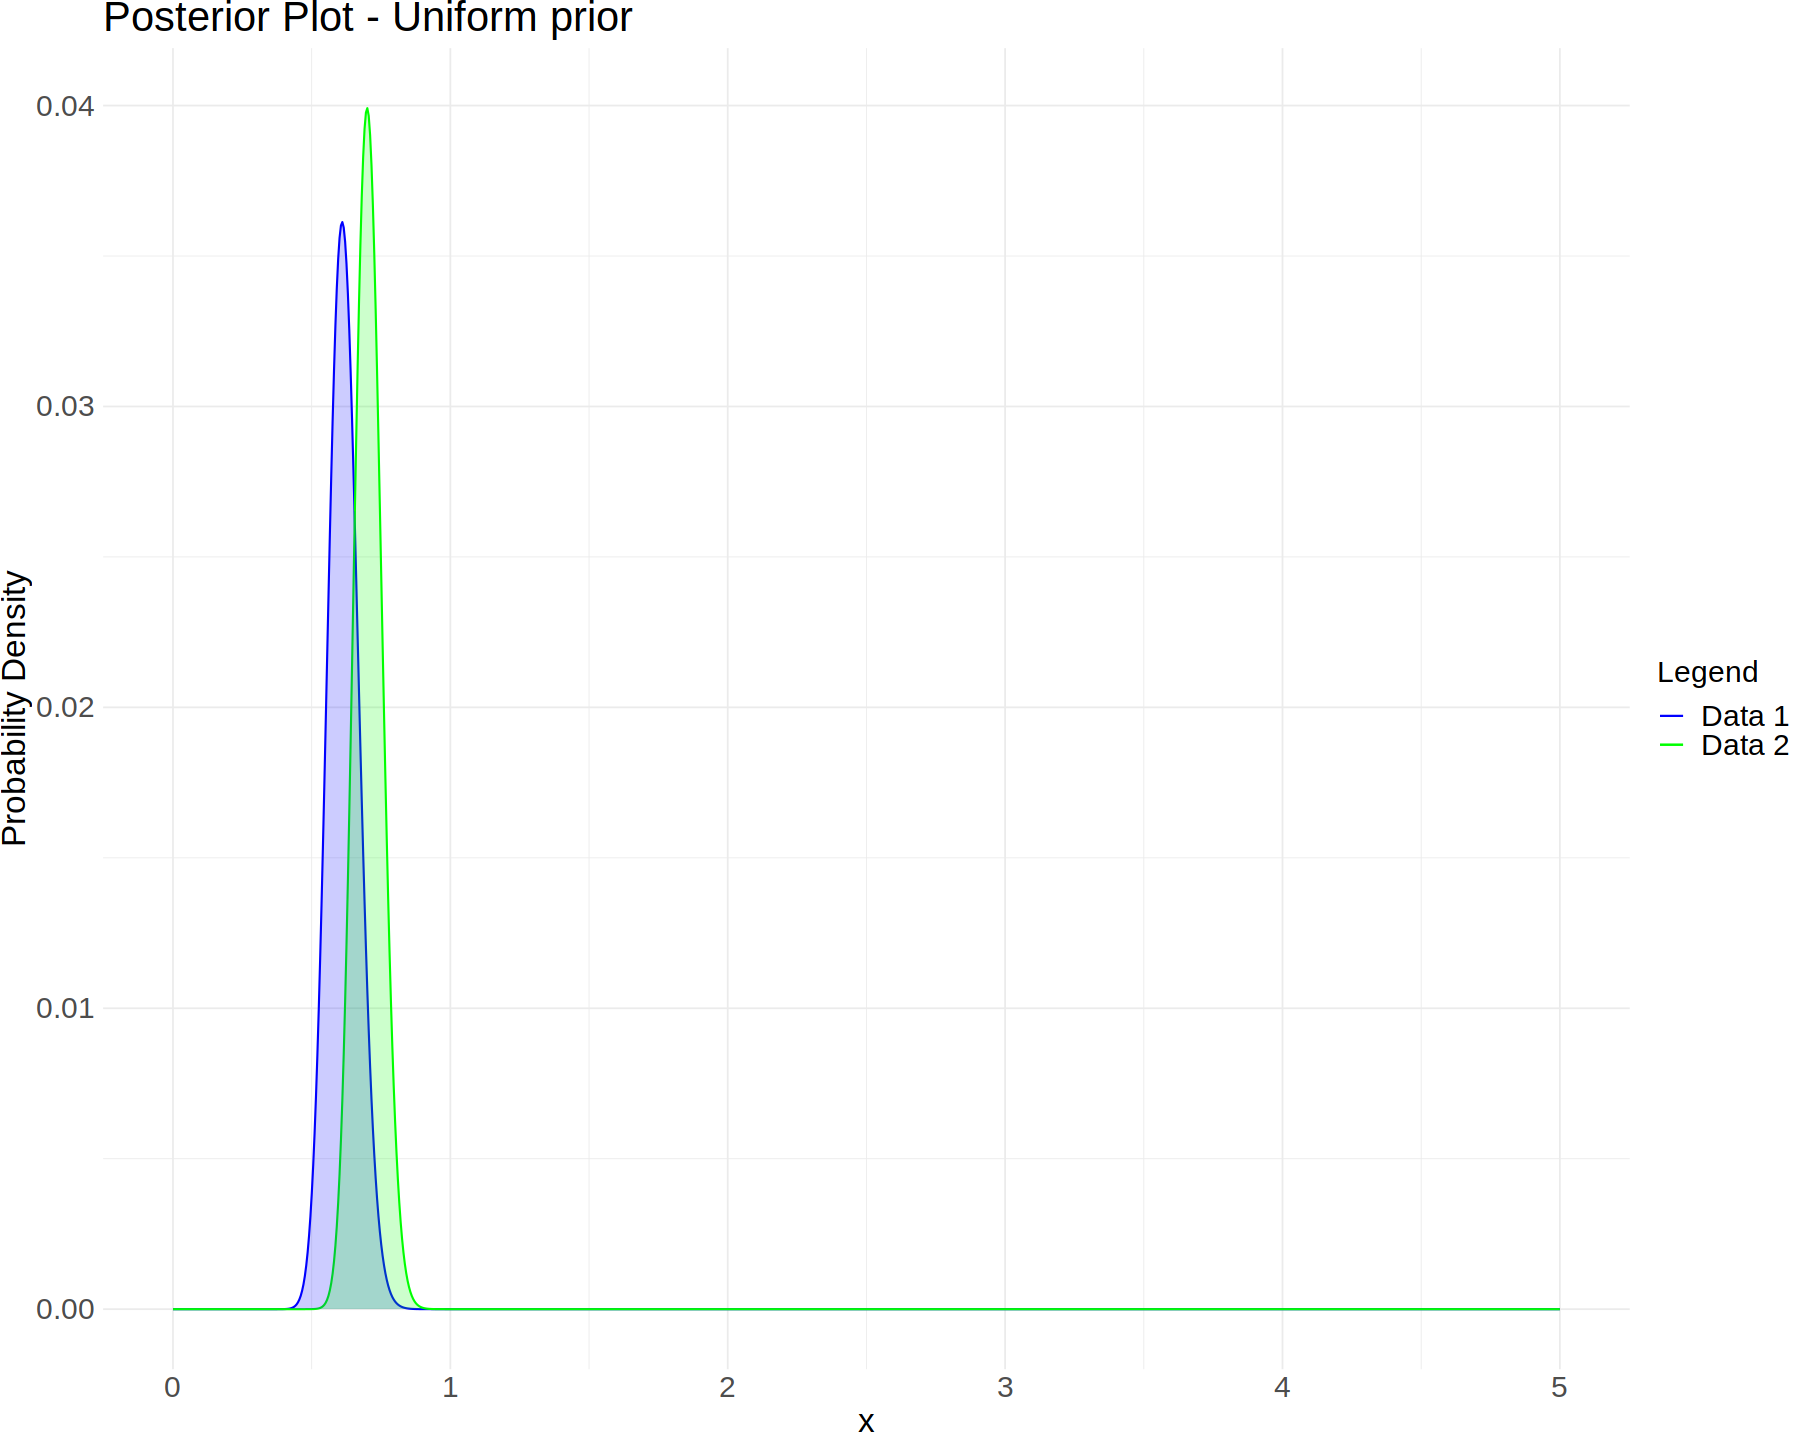

In [3]:
# Plot the gamma distribution 
options(repr.plot.width = 15, repr.plot.height = 12)
plot1 <- data.frame(x = x, y1 = U_posterior_n_N1, y2=U_posterior_n_N2)
   ggplot(data =plot1, aes(x)) + 
   geom_line(aes(y = y1, color = "Data 1"), linewidth = 0.6) +
   geom_line(aes(y = y2, color = "Data 2"), linewidth = 0.6) +
   geom_area(aes(y = y1, fill = "Data 1"), alpha = 0.2) +
   geom_area(aes(y = y2, fill = "Data 2"), alpha = 0.2) +
   theme_minimal() +
    scale_fill_manual(values = c("Data 1"= "blue", "Data 2" = "green"), name = "Legend Title") +
    scale_color_manual(name = "Legend", values = c("Data 1" = "blue", "Data 2" = "green")) + 
    labs(title = "Posterior Plot - Uniform prior", x = "x", y = "Probability Density") +
    theme(plot.margin = margin(1, 1, 1, 1, "pt"))+
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    guides(fill = 'none')

Warning message:
“Removed 850 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 850 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 850 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 850 rows containing missing values (`geom_line()`).”


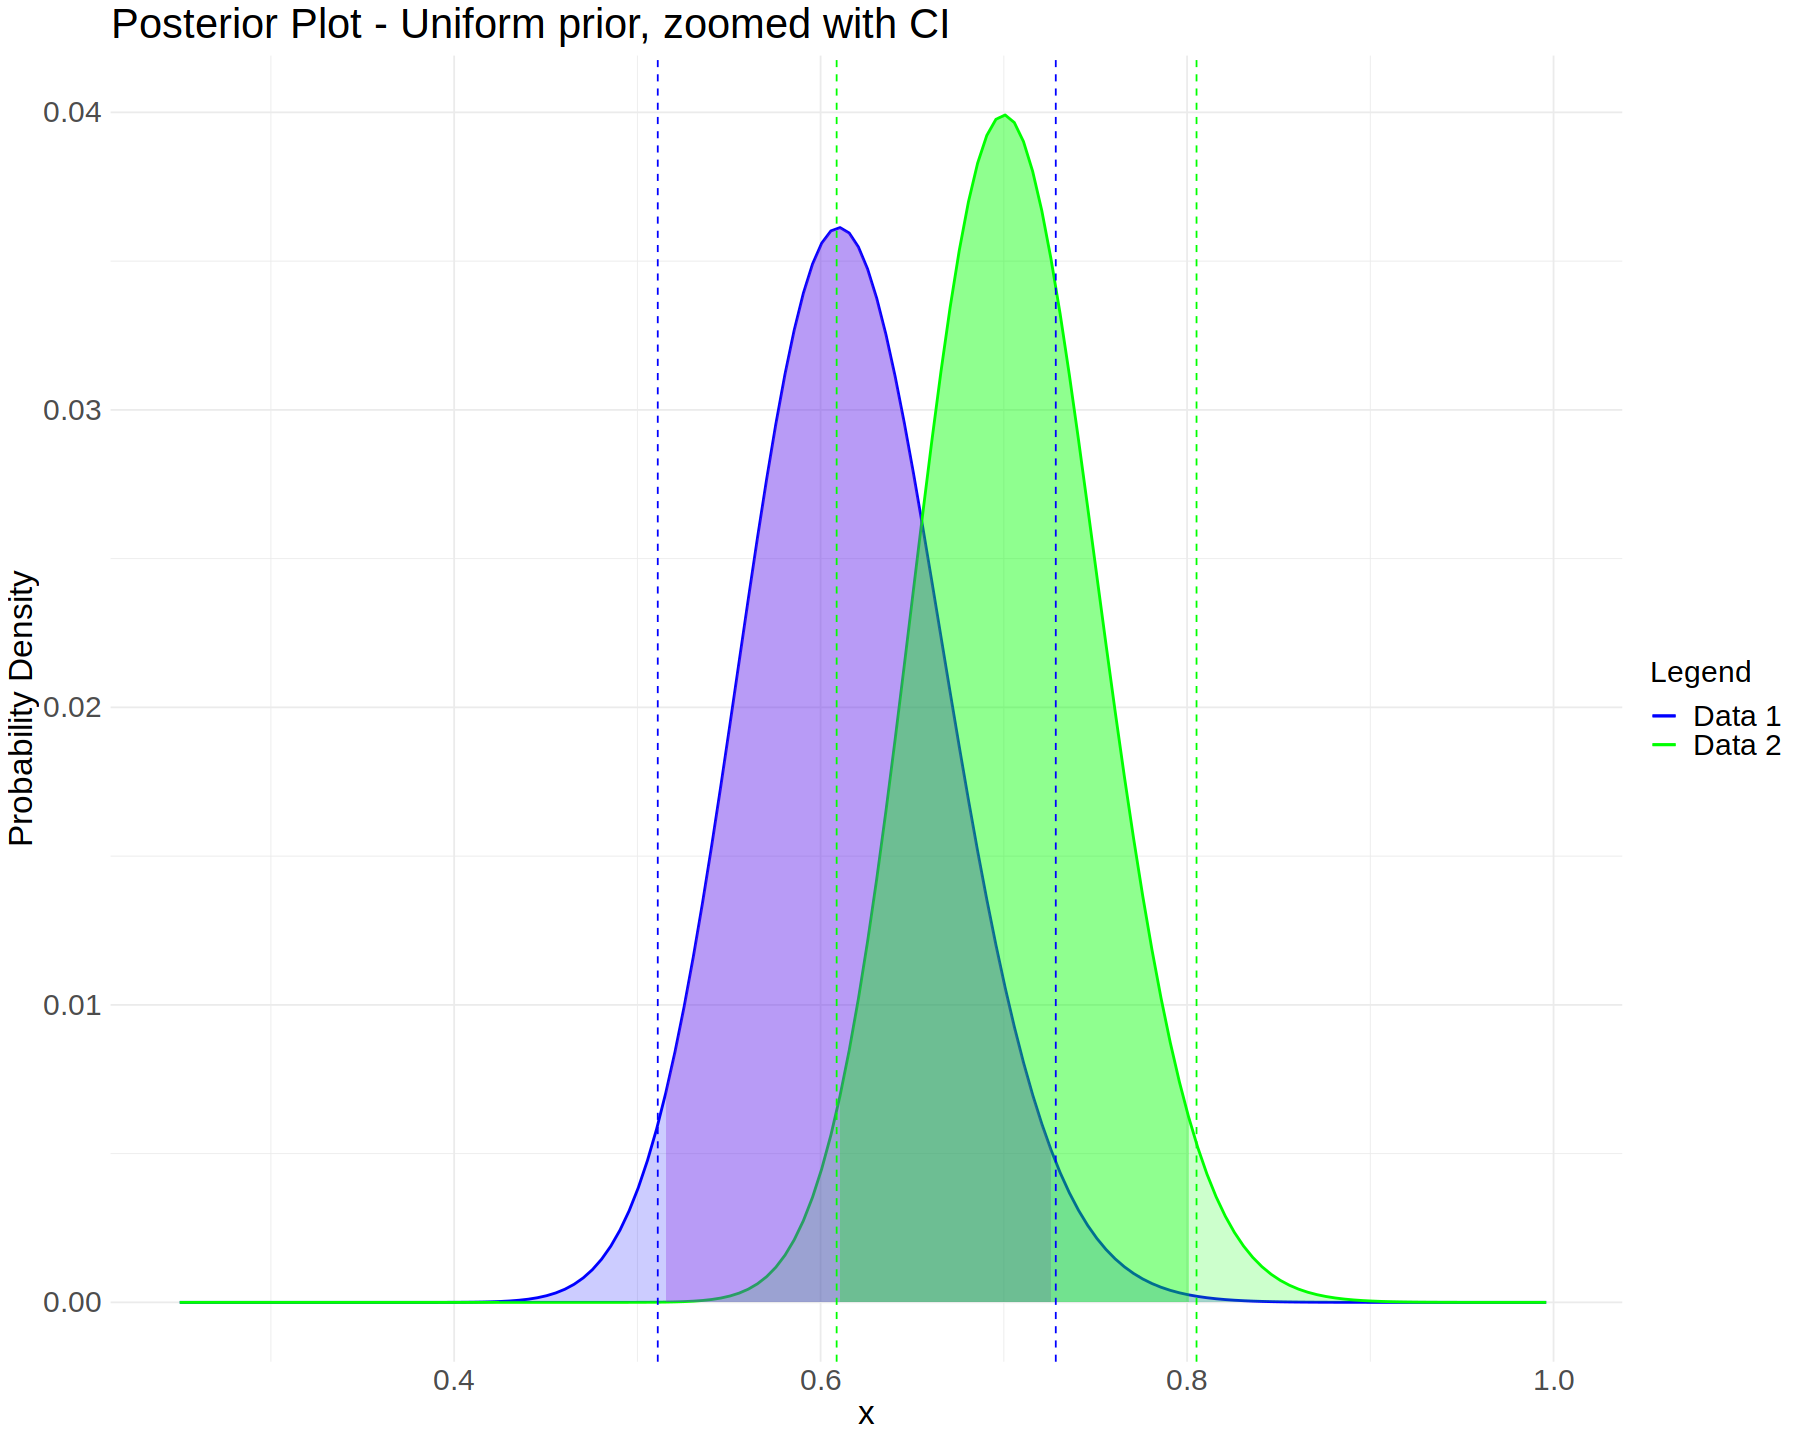

In [4]:
#plot the posterior, zoomed in, with CI
plot1 <- data.frame(x = x, y1 = U_posterior_n_N1, y2=U_posterior_n_N2)
   ggplot(data =plot1, aes(x)) + 
   geom_line(aes(y = y1, color = "Data 1"), linewidth = 0.8) +
   geom_line(aes(y = y2, color = "Data 2"), linewidth = 0.8) +
   geom_area(aes(y = y1, fill = "Data 1"), alpha = 0.2) +
   geom_area(aes(y = y2, fill = "Data 2"), alpha = 0.2) +

   geom_ribbon(aes(ymin = 0, ymax = y1), fill = "blueviolet", alpha = 0.3, 
              data = subset(plot1, x >= U_confidence_interval_N1[1] & x <= U_confidence_interval_N1[2])) +

   geom_ribbon(aes(ymin = 0, ymax = y2), fill = "green", alpha = 0.3, 
              data = subset(plot1, x >= U_confidence_interval_N2[1] & x <= U_confidence_interval_N2[2])) +

  geom_vline(xintercept = U_confidence_interval_N1[1], color = "blue", linetype = "dashed")+
  geom_vline(xintercept = U_confidence_interval_N1[2], color = "blue", linetype = "dashed")+
  geom_vline(xintercept = U_confidence_interval_N2[1], color = "green", linetype = "dashed")+
  geom_vline(xintercept = U_confidence_interval_N2[2], color = "green", linetype = "dashed")+
    xlim(0.25, 1) +
    theme_minimal() +
    scale_fill_manual(values = c("Data 1"= "blue", "Data 2" = "green"), name = "Legend Title") +
    scale_color_manual(name = "Legend", values = c("Data 1" = "blue", "Data 2" = "green")) + 
    labs(title = "Posterior Plot - Uniform prior, zoomed with CI", x = "x", y = "Probability Density") +
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    guides(fill = 'none')

(b) assuming now a Jeffreys’ prior, g(λ) ∝ 1/ λ , with λ > 0, compute and plot the posterior distribution for λ, the death rate over the measurement time.
Determine the posterior mean, median and variance, and compute the 95% credibility interval. CONTROLLLARE PRIOR E NOMI ASSI

In [5]:
#Jeffrey's prior distibution
alpha0.J <-0.5
lambda0.J <-0 

# Posterior distribution for N1
alpha1.J <- sum(y1) + alpha0.J
lambda1.J <- length(y1) + lambda0.J
J_posterior_N1 <- dgamma(x, shape = alpha1.J, rate = lambda1.J)
J_posterior_n_N1 <- J_posterior_N1/sum(J_posterior_N1)

# Posterior distribution for N2
alpha2.J <- sum(y2) + alpha0.J
lambda2.J <- length(y2) + lambda0.J
J_posterior_N2 <- dgamma(x, shape = alpha2.J, rate = lambda2.J)
J_posterior_n_N2 <- J_posterior_N2/sum(J_posterior_N2)

# Posterior mean, median, and variance for N1 and N2
J_post_mean1 <- alpha1.J  / lambda1.J 
J_post_median1 <- qgamma(0.5, alpha1.J , rate = lambda1.J )
J_post_var1 <- alpha1.J  / lambda1.J **2

J_post_mean2 <- alpha2.J  / lambda2.J 
J_post_median2 <- qgamma(0.5, alpha2.J , rate = lambda2.J )
J_post_var2 <- alpha2.J  / lambda2.J **2

#95% confidence interval for N1 and N2
J_confidence_interval_N1 <- qgamma(c(0.025, 0.975), shape = alpha1.J , rate = lambda1.J )
J_confidence_interval_N2 <- qgamma(c(0.025, 0.975), shape = alpha2.J , rate = lambda2.J )

results.J  <- data.frame(
    Dataset=c('1','2'),
    Mean = c(round(J_post_mean1,3),round(J_post_mean2,3)),
    Variance =c(round(J_post_var1,3),round(J_post_var2,3)),
    Median=c(round(J_post_median1,1),round(J_post_median2,1)),
    Confidence_Interval = c(paste("[", round(J_confidence_interval_N1[1], 2), ", ", round(J_confidence_interval_N1[2], 2), "]", sep = ""),
                          paste("[", round(J_confidence_interval_N2[1], 2), ", ", round(J_confidence_interval_N2[2], 2), "]", sep = ""))
)
options("show.colnames" = FALSE)
results.J 

Dataset,Mean,Variance,Median,Confidence_Interval
<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,0.613,0.003,0.6,"[0.51, 0.73]"
2,0.702,0.003,0.7,"[0.61, 0.8]"


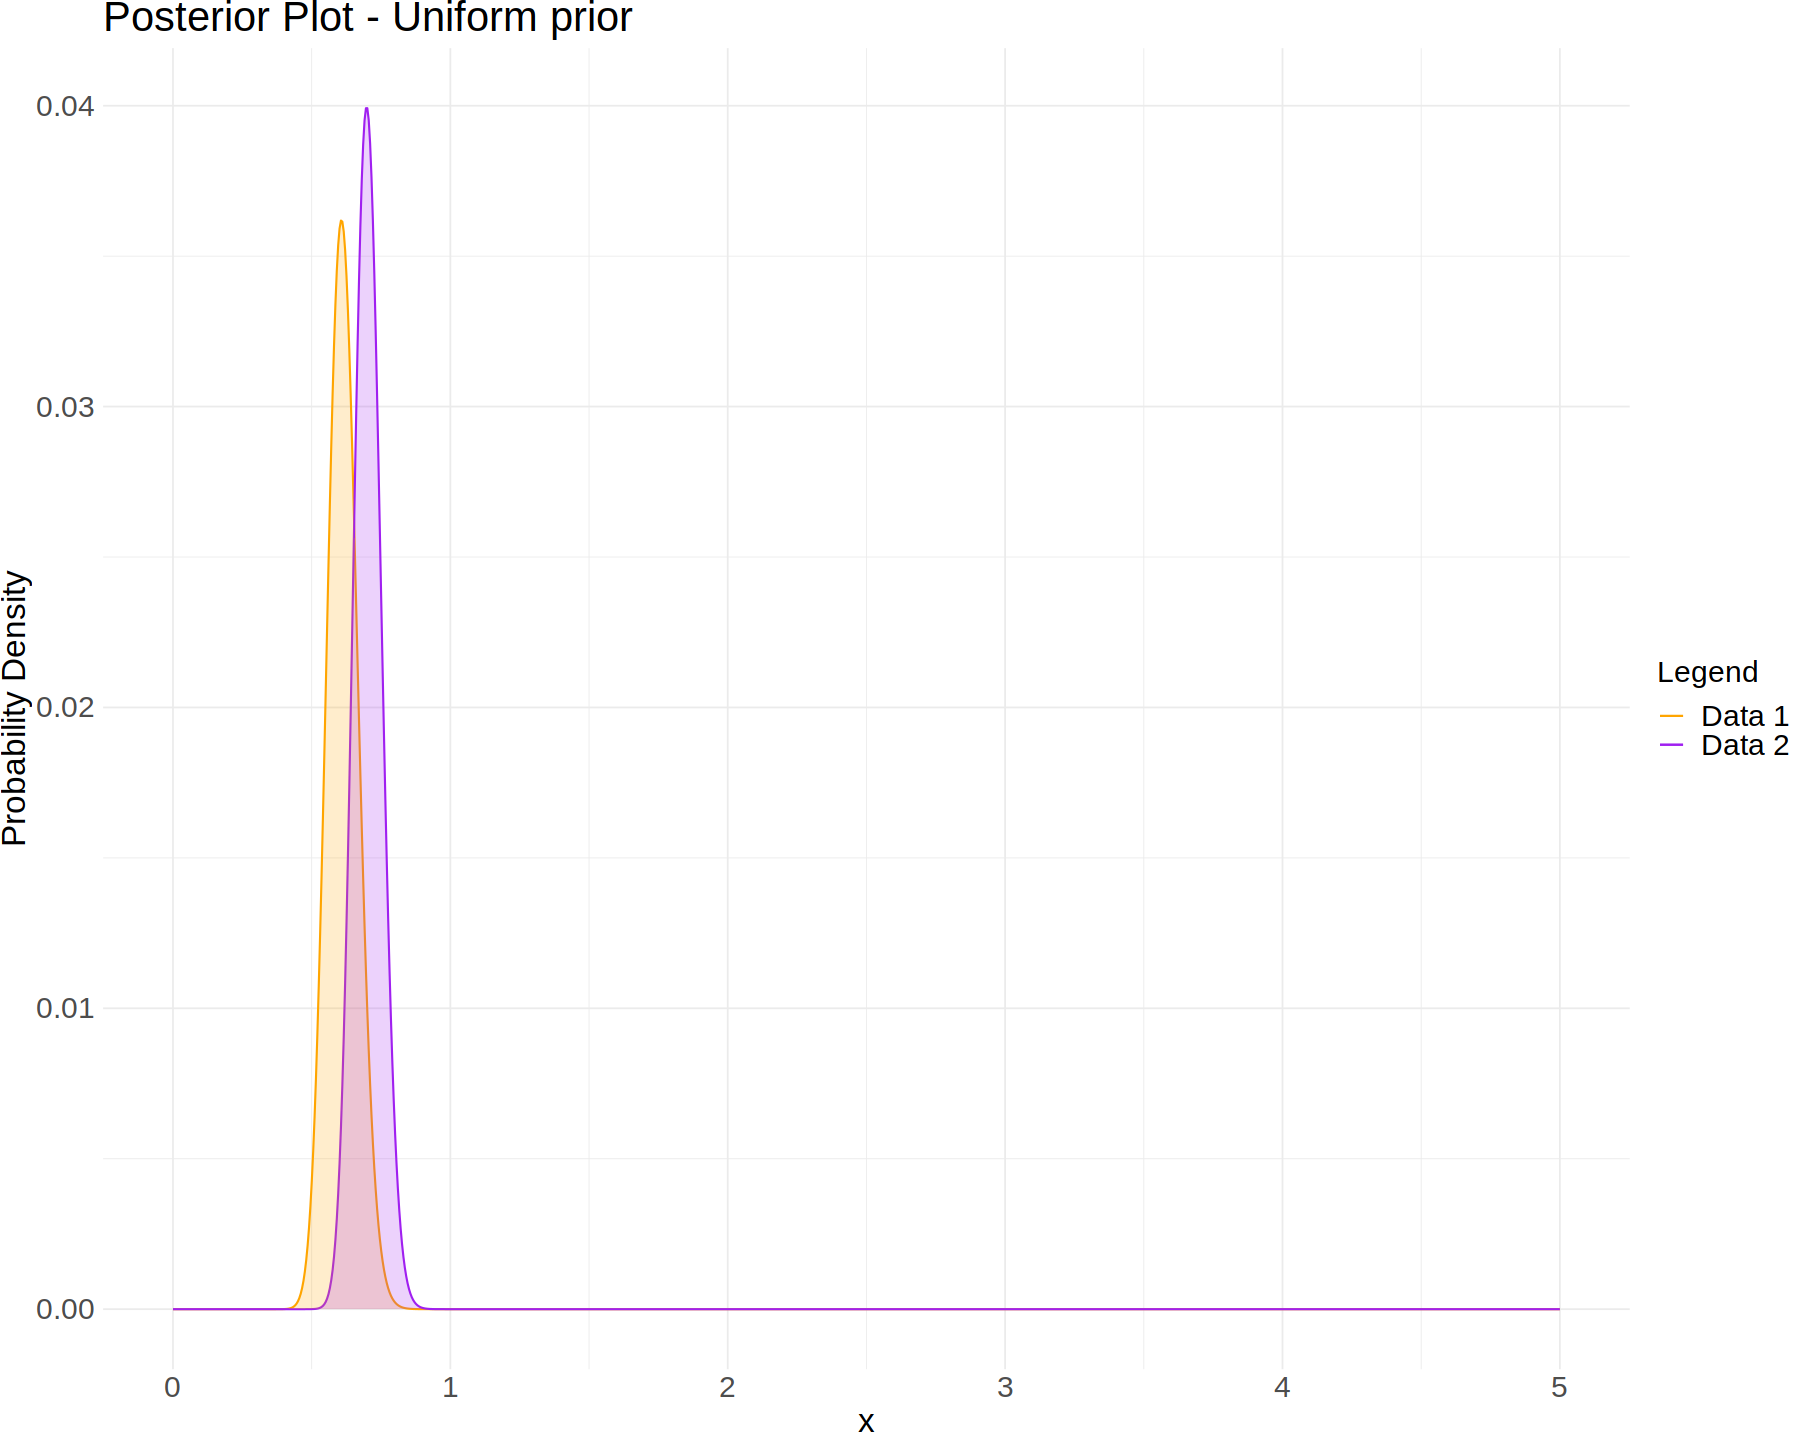

In [6]:
# Plot the gamma distribution 
options(repr.plot.width = 15, repr.plot.height = 12)
plot1 <- data.frame(x = x, y1 = J_posterior_n_N1, y2=J_posterior_n_N2)
   ggplot(data =plot1, aes(x)) + 
   geom_line(aes(y = y1, color = "Data 1"), linewidth = 0.6) +
   geom_line(aes(y = y2, color = "Data 2"), linewidth = 0.6) +
   geom_area(aes(y = y1, fill = "Data 1"), alpha = 0.2) +
   geom_area(aes(y = y2, fill = "Data 2"), alpha = 0.2) +
   theme_minimal() +
    scale_fill_manual(values = c("Data 1"= "orange", "Data 2" = "purple"), name = "Legend Title") +
    scale_color_manual(name = "Legend", values = c("Data 1" = "orange", "Data 2" = "purple")) + 
    labs(title = "Posterior Plot - Uniform prior", x = "x", y = "Probability Density") +
    theme(plot.margin = margin(1, 1, 1, 1, "pt"))+
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    guides(fill = 'none')

Warning message:
“Removed 850 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 850 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 850 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 850 rows containing missing values (`geom_line()`).”


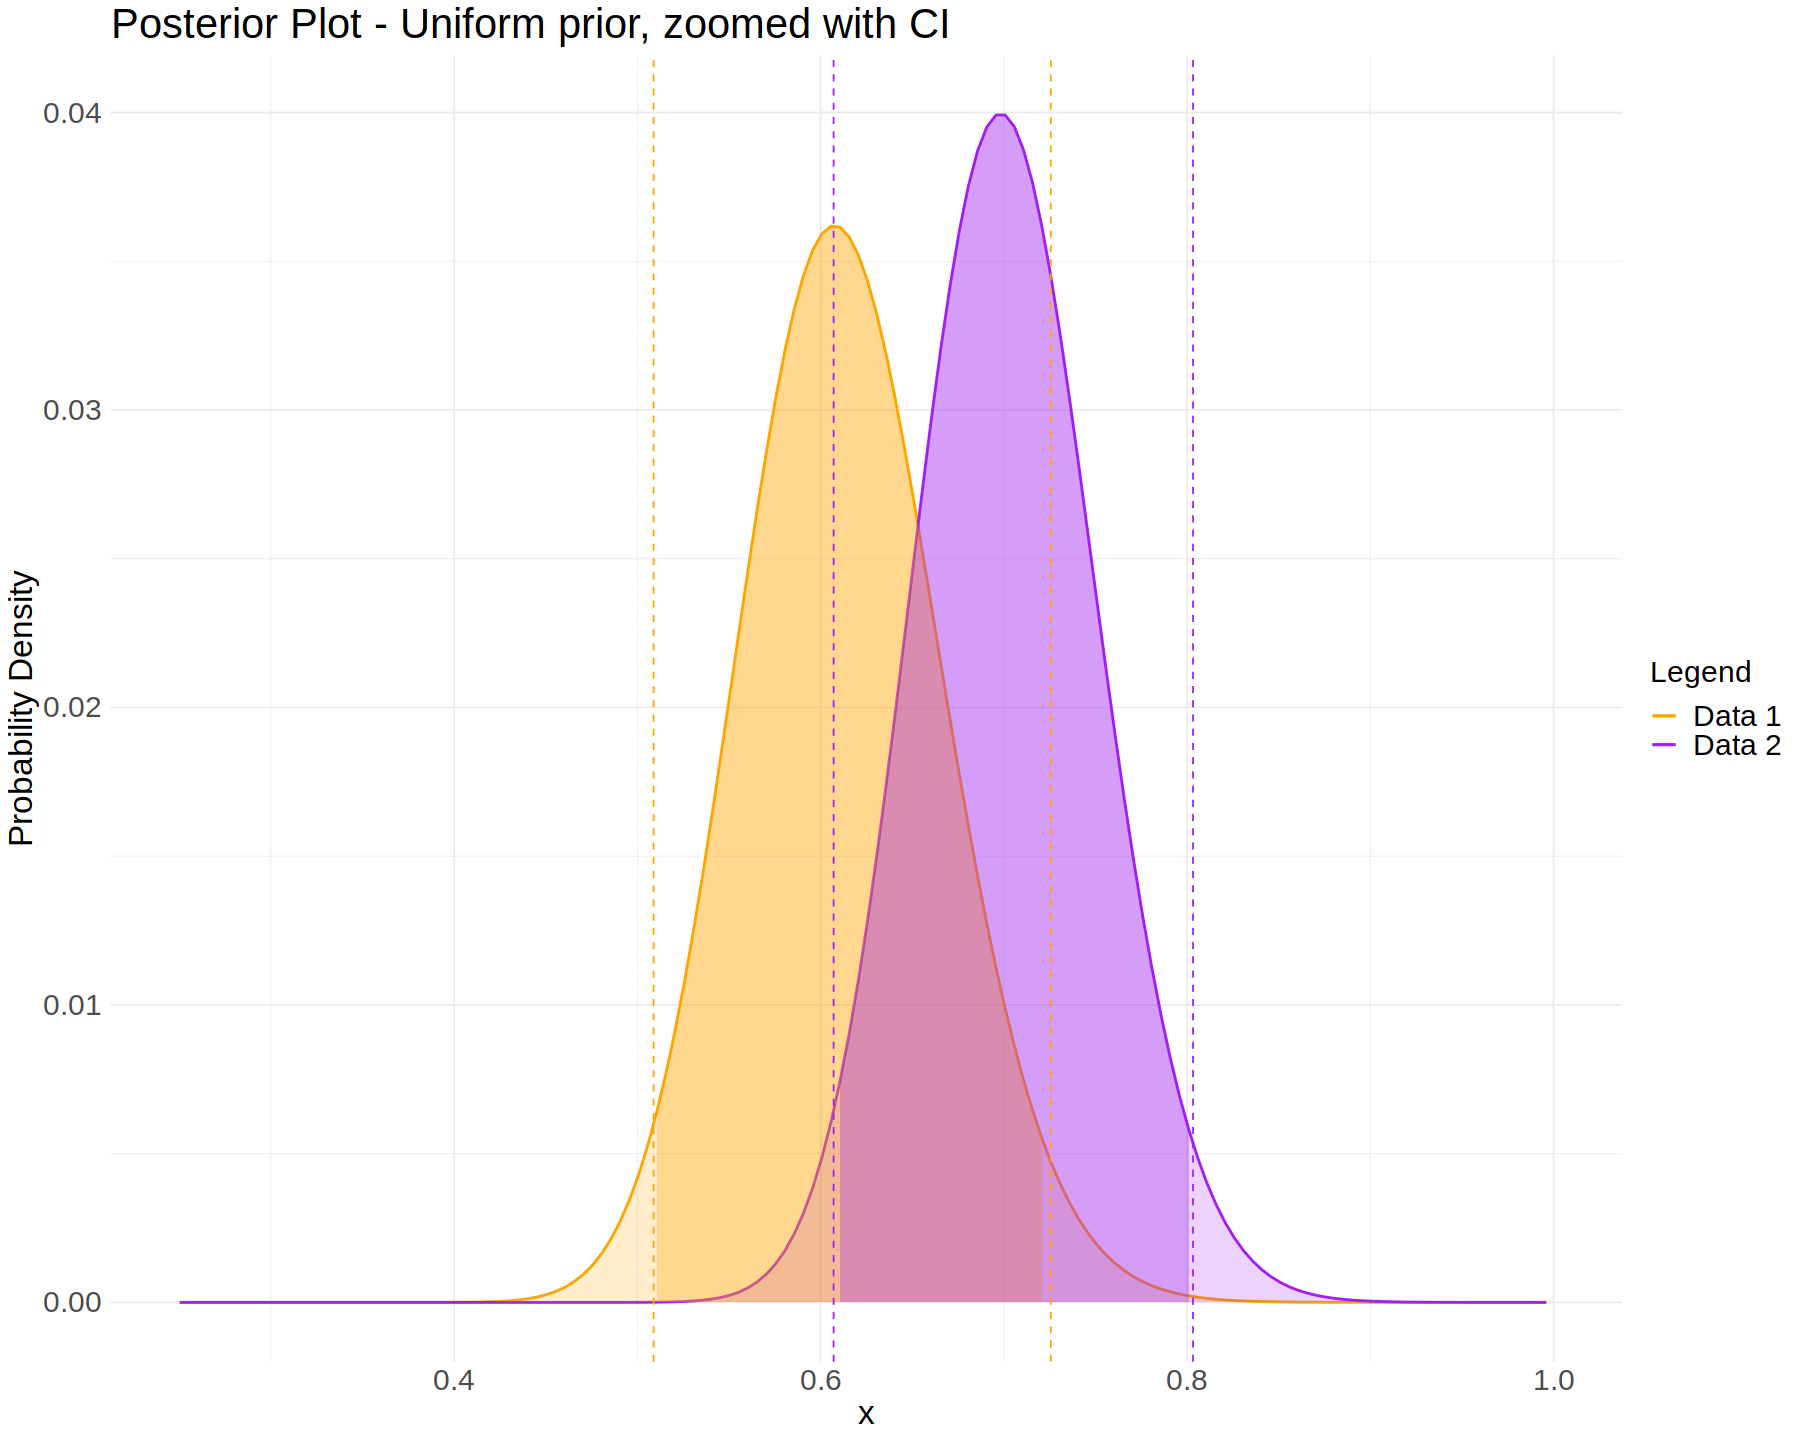

In [7]:
#plot the posterior, zoomed in, with CI
plot1 <- data.frame(x = x, y1 = J_posterior_n_N1, y2=J_posterior_n_N2)
   ggplot(data =plot1, aes(x)) + 
   geom_line(aes(y = y1, color = "Data 1"), linewidth = 0.8) +
   geom_line(aes(y = y2, color = "Data 2"), linewidth = 0.8) +
   geom_area(aes(y = y1, fill = "Data 1"), alpha = 0.2) +
   geom_area(aes(y = y2, fill = "Data 2"), alpha = 0.2) +

   geom_ribbon(aes(ymin = 0, ymax = y1), fill = "orange", alpha = 0.3, 
              data = subset(plot1, x >= J_confidence_interval_N1[1] & x <= J_confidence_interval_N1[2])) +

   geom_ribbon(aes(ymin = 0, ymax = y2), fill = "purple", alpha = 0.3, 
              data = subset(plot1, x >= J_confidence_interval_N2[1] & x <= J_confidence_interval_N2[2])) +

  geom_vline(xintercept = J_confidence_interval_N1[1], color = "orange", linetype = "dashed")+
  geom_vline(xintercept = J_confidence_interval_N1[2], color = "orange", linetype = "dashed")+
  geom_vline(xintercept = J_confidence_interval_N2[1], color = "purple", linetype = "dashed")+
  geom_vline(xintercept = J_confidence_interval_N2[2], color = "purple", linetype = "dashed")+
    xlim(0.25, 1) +
    theme_minimal() +
    scale_fill_manual(values = c("Data 1"= "orange", "Data 2" = "purple"), name = "Legend Title") +
    scale_color_manual(name = "Legend", values = c("Data 1" = "orange", "Data 2" = "purple")) + 
    labs(title = "Posterior Plot - Uniform prior, zoomed with CI", x = "x", y = "Probability Density") +
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    guides(fill = 'none')

## Exercise 2
Solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions
introduced during lectures, or using a MCM library like JAGS.

In [8]:
library(rjags)
library(coda)

Warning message:
“il pacchetto ‘rjags’ è stato creato con R versione 4.2.3”
Caricamento del pacchetto richiesto: coda

Warning message:
“il pacchetto ‘coda’ è stato creato con R versione 4.2.1”
Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



In [9]:
# Set of observations
data <- NULL
data$X <- y1

# Set the desired number of iterations, burn-in, and thinning
n_iter <- 1000000  # Total number of iterations
n_burn <- 1000   # Number of burn-in iterations
n_thin <- 10     # Thinning factor (e.g., keep every 10th sample)

# Run the JAGS model
model <- "uniform_prior.bug"
jm <- jags.model(model , data)

# Update the Markov chain (Burn -in)
update (jm , n_burn)

chain <- coda.samples (jm,c("Y","lambda"), n.iter=n_iter, thin= n_thin)
print( summary (chain ))


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 203

Initializing model


Iterations = 1010:1001000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6172 0.78985 0.0024977      0.0024977
lambda 0.6151 0.05557 0.0001757      0.0001757

2. Quantiles for each variable:

        2.5%    25%    50%    75%  97.5%
Y      0.000 0.0000 0.0000 1.0000 3.0000
lambda 0.511 0.5769 0.6134 0.6515 0.7282



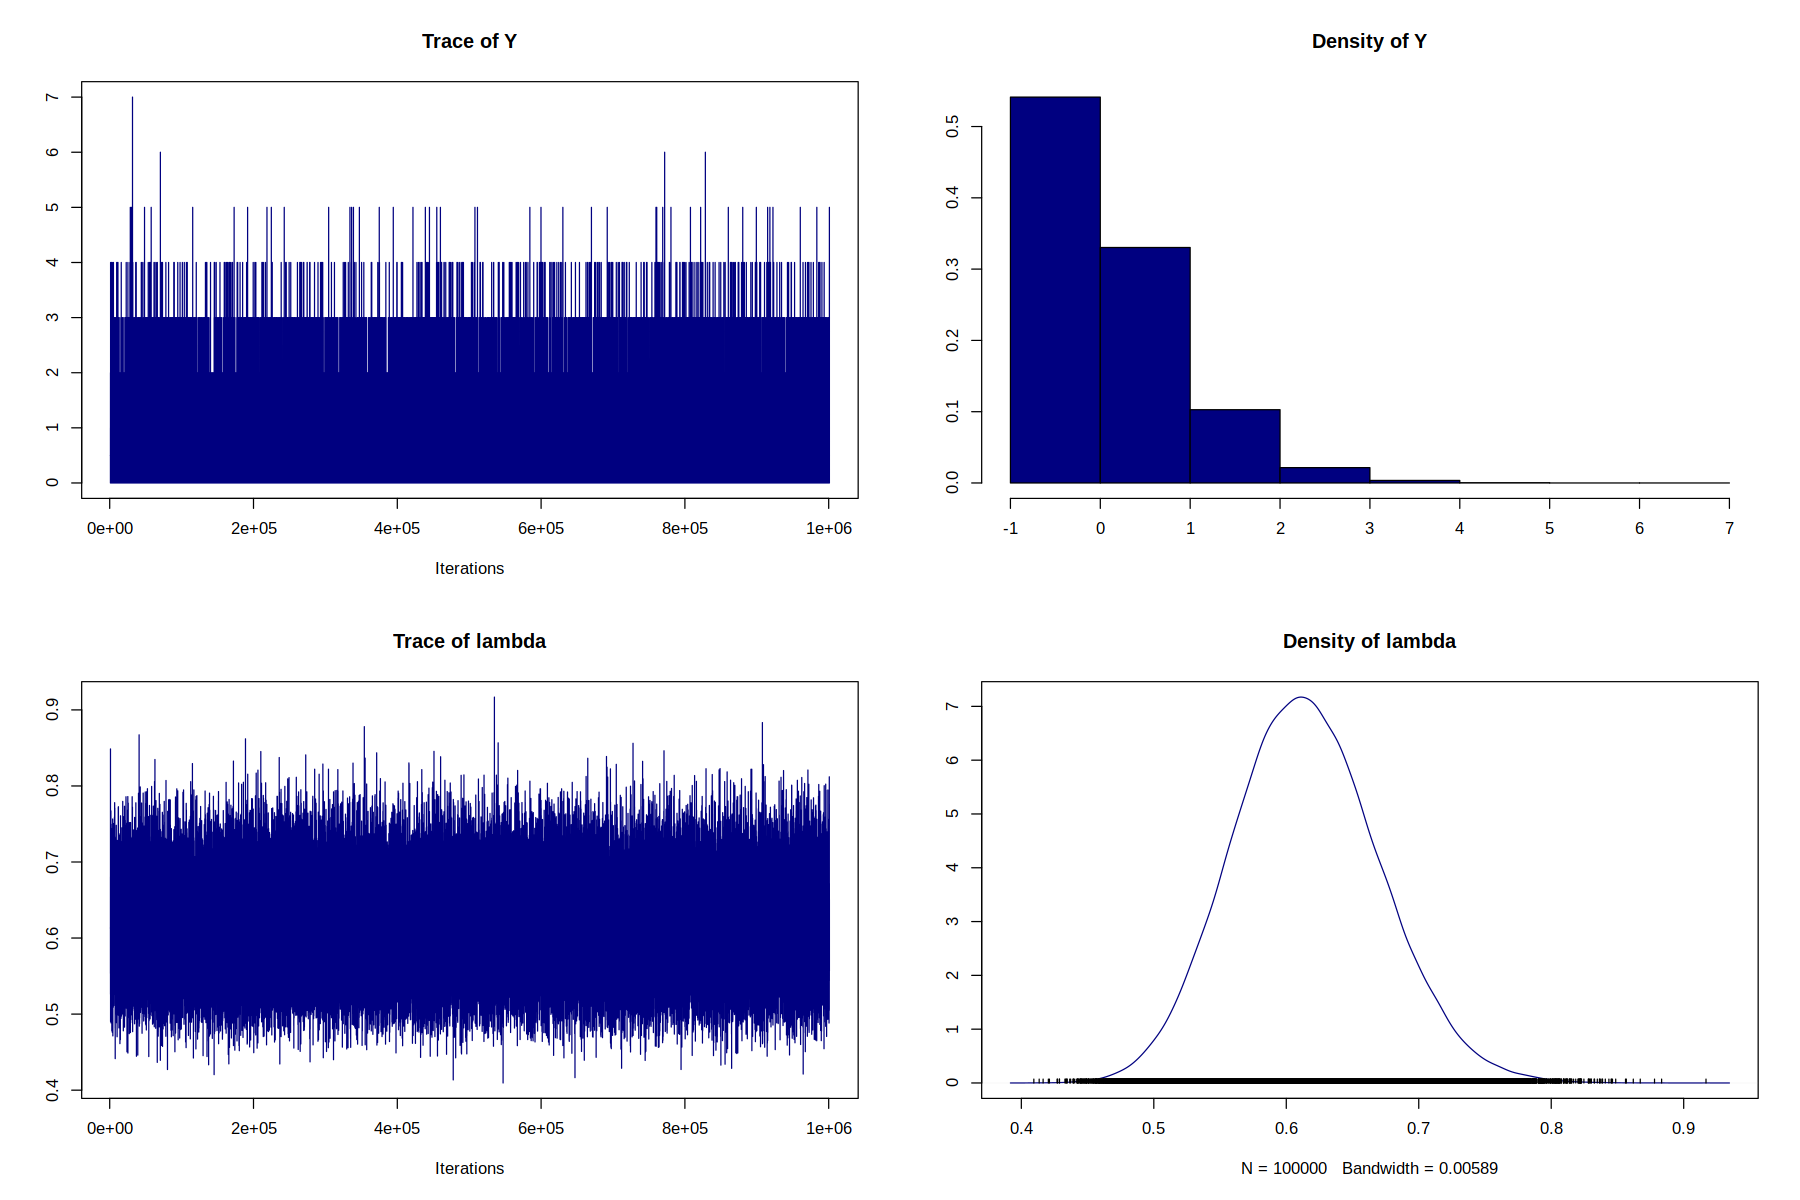

In [10]:
options(repr.plot.width = 15, repr.plot.height = 10)
plot(chain , col="navy")

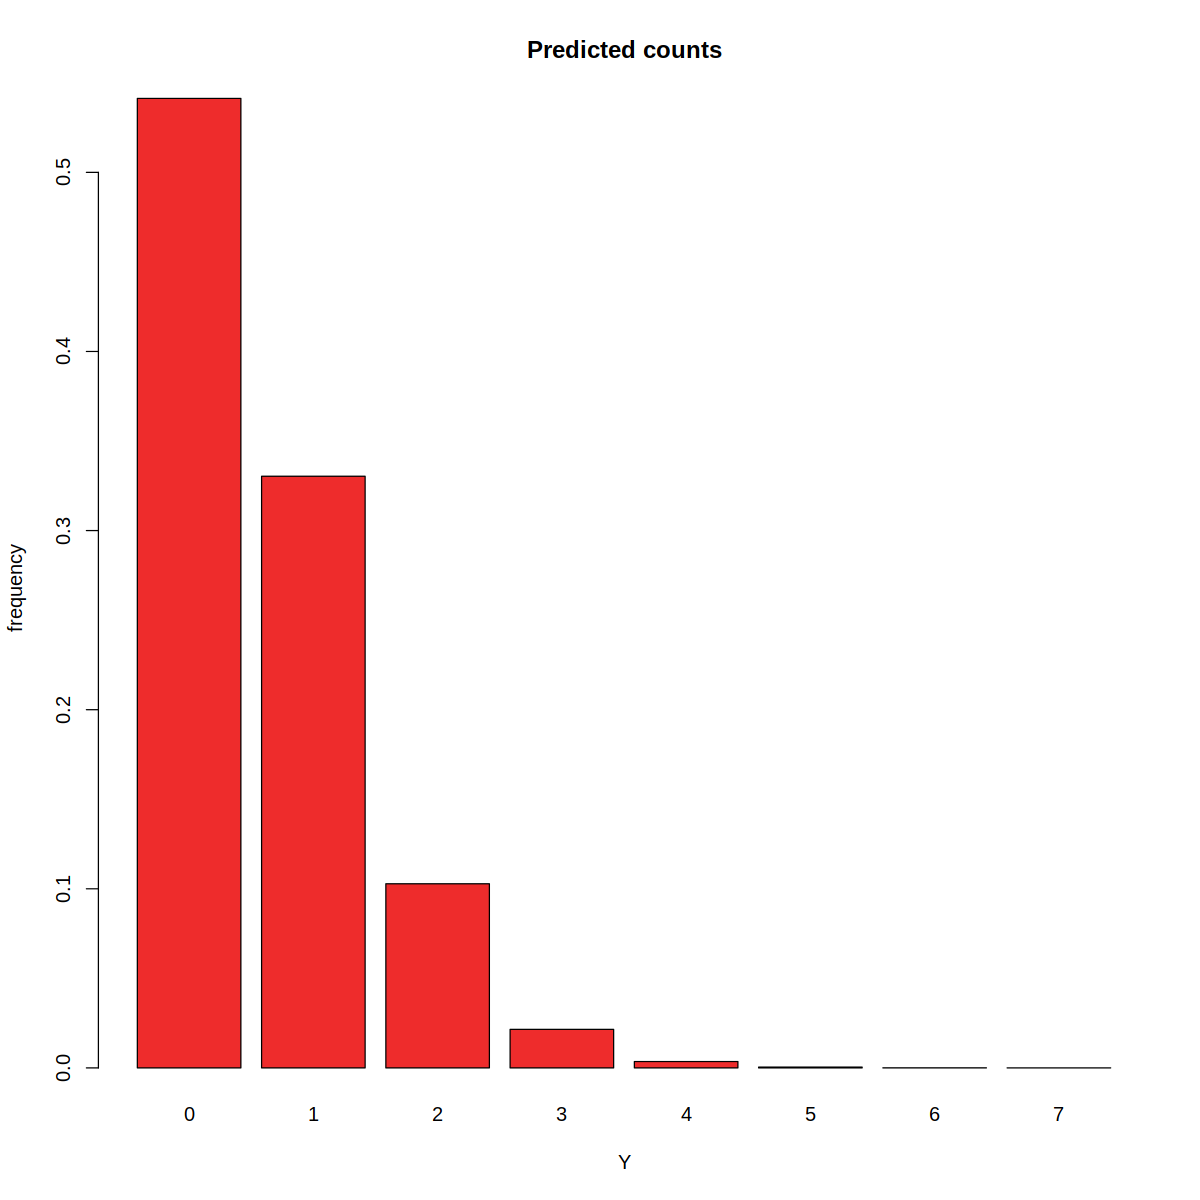

In [11]:
# Let ’s format our chain and plot the predicted ones
chain.df <- as.data.frame ( as.mcmc( chain ) )
ty <- table(chain.df$Y)
options(repr.plot.width = 10, repr.plot.height = 10)
barplot (ty/sum(ty), col='firebrick 2', xlab='Y', ylab='frequency',
main= sprintf('Predicted counts'))

## Exercise 3
A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
Indicating with p the probability that a sample of water taken from the stream has a high bacter X level, <br>
- (a) find the frequentist estimator for p
- (b) using a Beta(1, 10) prior for p, calculate and posterior distribution P (p|y)
- (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
- (d) test the hypotesis H 0 : p = 0.1 versus H 1 : p  != 0.1 at 5% level of significance with both the frequentist and bayesian approach

A new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level <br>
- (e) find the frequentist estimator for p
- (f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.
- (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
- (h) test the hypotesis H 0 : p = 0.1 versus H 1 : p  != 0.1 at 5% level of significance with both the frequentist and bayesian approach


In [8]:
library(wesanderson)
library(viridis)
library(ggplot2)

#### (a) find the frequentist estimator for p

In [9]:
n <- 116 #number of samples
y <- 11   # total positive samples
cat('The frequentist estimator for the probability p of a water sample having a high bacter X level is: ', round(y/n,3))

The frequentist estimator for the probability p of a water sample having a high bacter X level is:  0.095

#### (b) using a Beta(1, 10) prior for p, calculate and posterior distribution P (p|y)

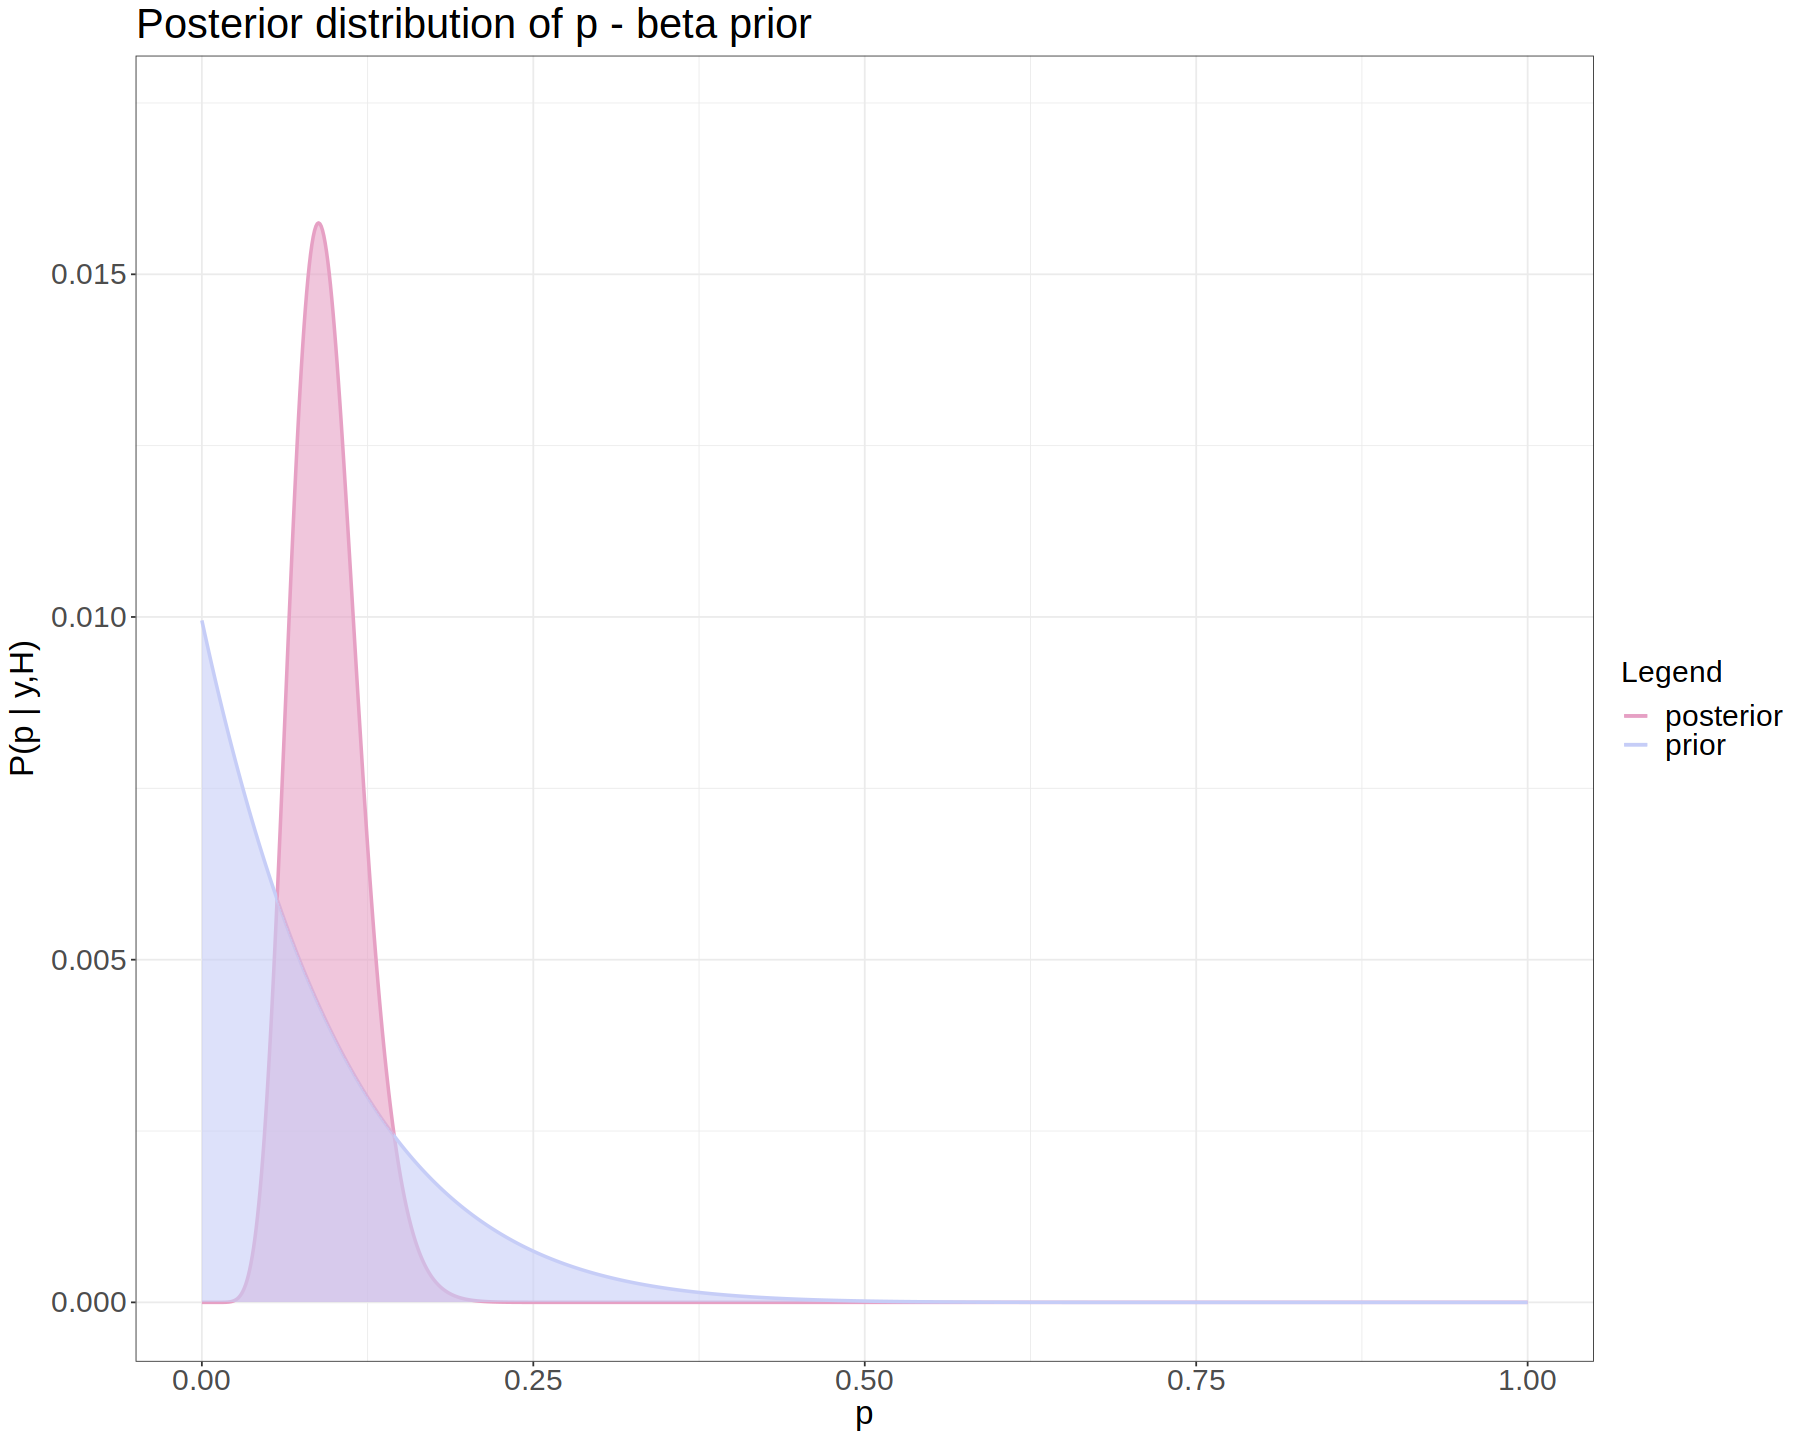

In [10]:
# Define prior beta function
beta_prior_function <- function(p, alpha, beta) {
  beta_dist <- dbeta(p, alpha, beta)
  beta_n <- beta_dist/sum(beta_dist)
  return(beta_n)
}

# Define likelihood function
likelihood_function <- function(y, n, p) {
  likelihood <- dbinom(y, n, p)
  likelihood_n <- likelihood/sum(likelihood)
  return(likelihood_n)
}

# Define posterior beta function
beta_post_function <- function(p, alpha, beta, y, n) {
  beta_dist <- dbeta(p, alpha+y, beta+n-y)
  beta_n <- beta_dist/sum(beta_dist)
  return(beta_n)
}

p <- seq(0, 1, by = 0.001) # Probability of a water sample having a high bacter level
alpha <- 1
beta <- 10
prior <- beta_prior_function(p, alpha, beta)
likelihood <- likelihood_function(y,n,p)
posterior <- beta_post_function(p, alpha, beta, y, n)


#Plot
options(repr.plot.width = 15, repr.plot.height = 12)
df3.1 <- data.frame(x = p, y1 = posterior, y2=prior) 
    ggplot(data =df3.1, aes(x)) + 
    geom_line(aes(y = y1, color = "posterior"), linewidth = 1) +
    geom_line(aes(y = y2, color = "prior"), linewidth = 1) +
    geom_area(aes(y = y1, fill = "posterior"), alpha = 0.6) +
    geom_area(aes(y = y2, fill = "prior"), alpha = 0.6) +
    theme_bw()+
    ylim(0, 1.1*max(posterior)) +
    xlim(0, 1) +
    xlab("p") +
    ylab(expression(paste(P, "(p | y,H)"))) +
    scale_fill_manual(values = wes_palette("GrandBudapest2", n = 2))+
    scale_color_manual(name = "Legend", values = wes_palette("GrandBudapest2", n = 2)) + 
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    guides(fill = 'none') +
    ggtitle("Posterior distribution of p - beta prior")

#### (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

The posterior mean and variance are:  0.094 , 0.001
The 95% credibility interval is:  [ 0.05 ; 0.15 ]

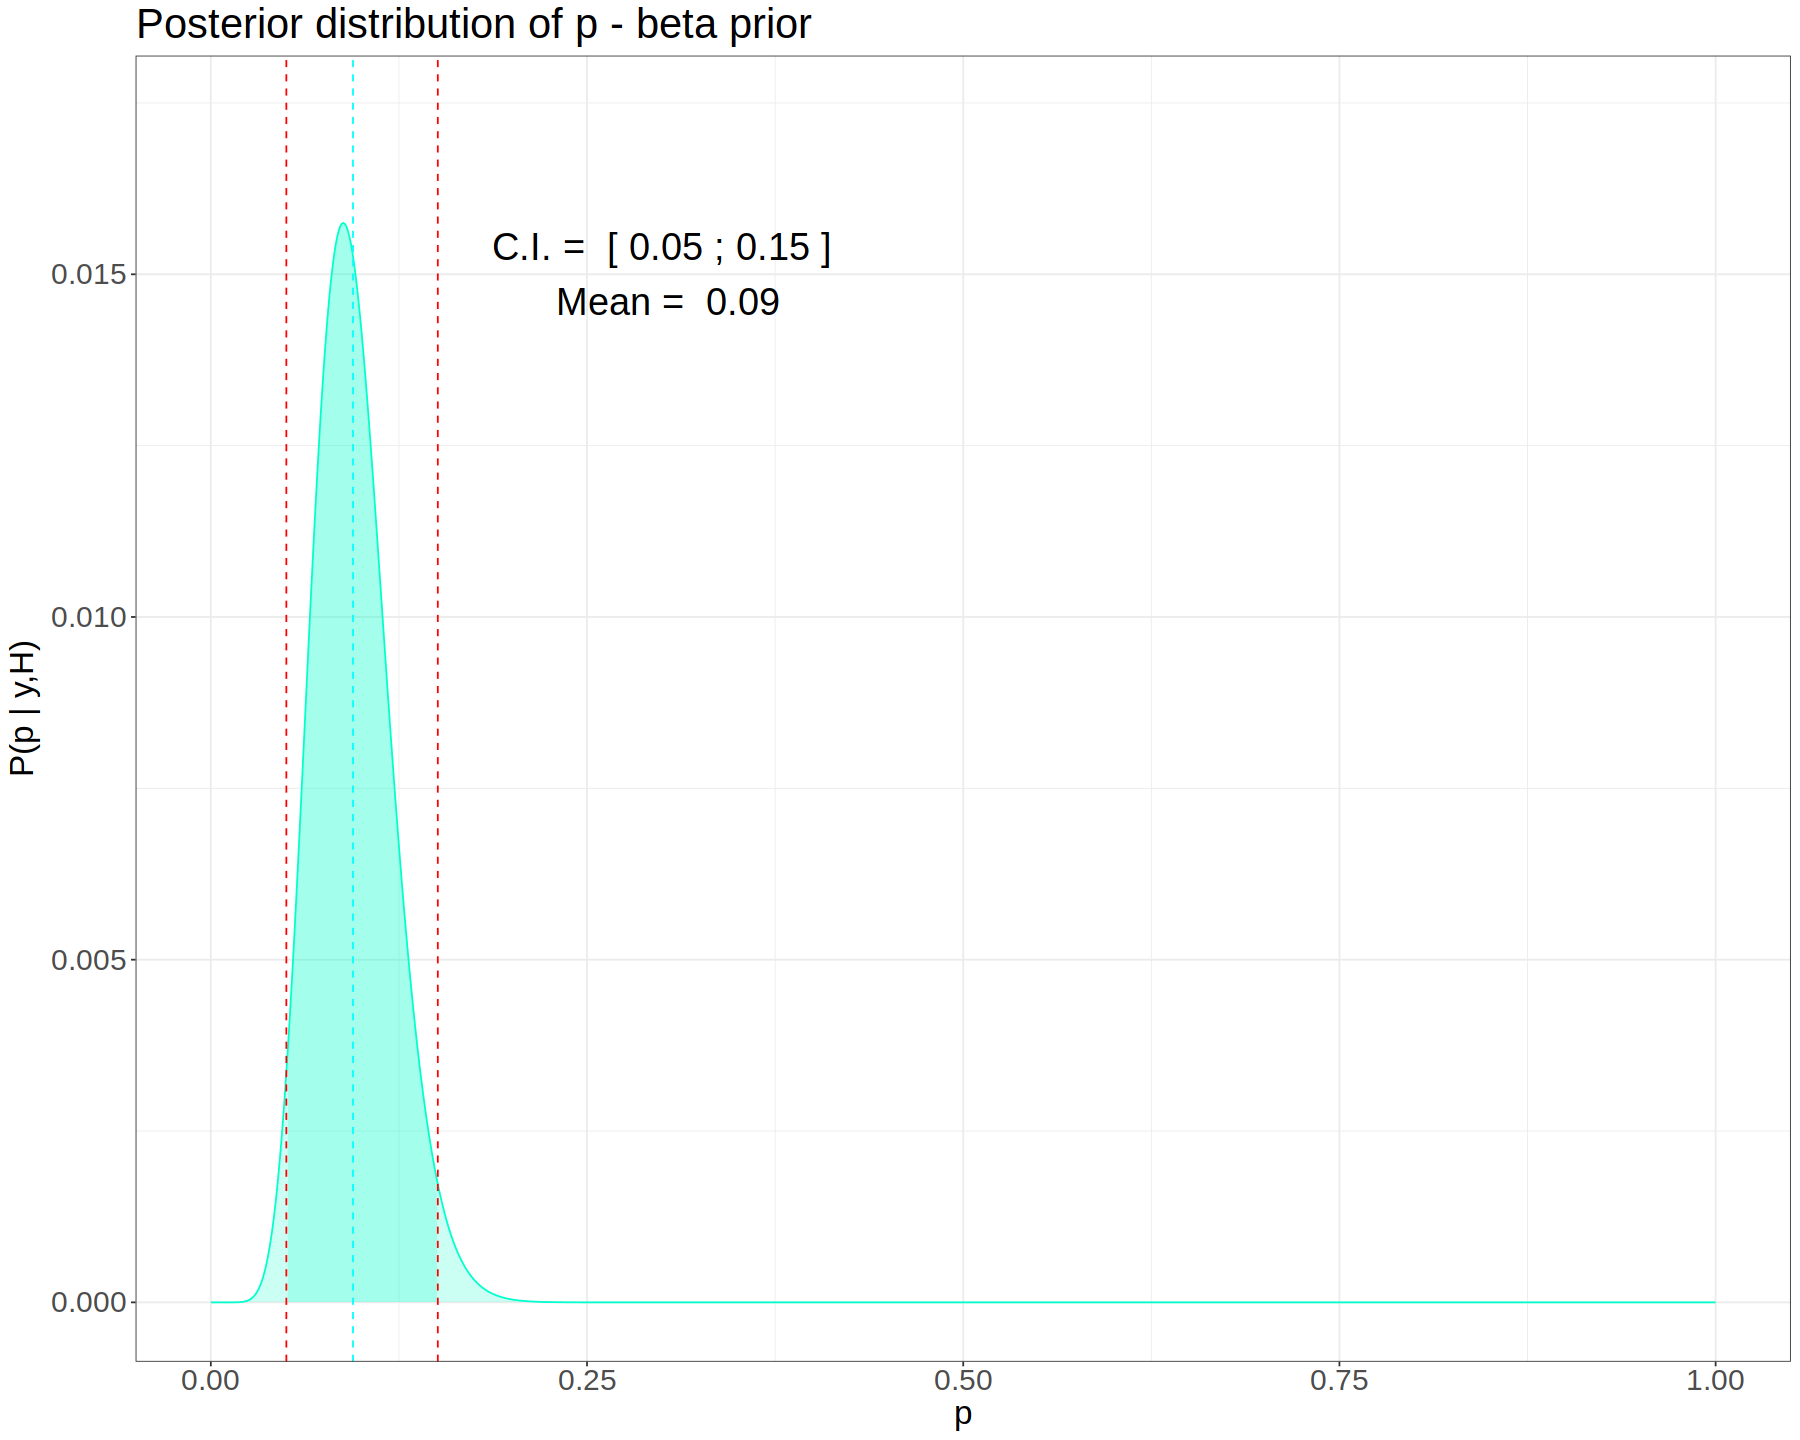

In [15]:
#compute the bayesian estimator for p
beta_mean <- (alpha+y) /( alpha + beta+n)
beta_var <- ((alpha+y) /( alpha + beta+n)**2)*(beta+n-y)/(alpha+beta+n+1)
beta_var_2 <- sum(p*p*posterior)-beta_mean**2  #equivalent calculation

#95% credibility interval
p_CI <- qbeta(c(0.025,0.975),  alpha+y, beta+n-y)

#results
cat("The posterior mean and variance are: ", round(beta_mean,3), ',', round(beta_var,3))
cat("\nThe 95% credibility interval is: ", '[',round(p_CI[1],2), ';',round(p_CI[2],2),']')


#Plot
options(repr.plot.width = 15, repr.plot.height = 12)
ggplot(data = data.frame(x = p, y = posterior), aes(x = x, y = y)) + 
    geom_line(color = "#00FFCC") +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "#00FFCC", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior), x >= p_CI[1])) +
    geom_ribbon(aes(ymax = y, ymin = 0), fill = "#00FFCC", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior), x <= p_CI[2])) +
    geom_vline(xintercept = p_CI[1], color = "red", linetype = "dashed")+
    geom_vline(xintercept = p_CI[2], color = "red", linetype = "dashed")+
    geom_vline(xintercept = beta_mean, color = "cyan", linetype = "dashed")+
    theme_bw()+
    ylim(0, 1.1*max(posterior)) +
    xlim(0, 1) +
    xlab("p") +
    ylab(expression(paste(P, "(p | y,H)"))) +
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    annotate("text", x = 0.3, y = 0.015, label = paste('C.I. = ','[',round(p_CI[1],2), ';',round(p_CI[2],2),']\n', 'Mean = ', round(beta_mean,2)), size=8)+
    guides(fill = 'none') +
    ggtitle("Posterior distribution of p - beta prior")

#### (d) test the hypotesis H 0 : p = 0.1 versus H 1 : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach) <br>
Bayesian approach <br>
In the Bayesian approach, I conduct a two-sided hypothesis test using the pre-computed posterior distribution and a significance level of 5%. I calculated a 95% credibility interval for the parameter p, representing a range of parameter values with a posterior probability of 95%. The value of p is observed to be in the fail-to-reject region, so we failed to reject the null hypotesis.

In [16]:
# Calculate the critical values using the previously calculated 95% CI
p0 <- 0.1
alpha <- 0.05
lower_bound <- p_CI[1]
upper_bound <- p_CI[2]

# Perform the two sideds hypothesis test
if (p0 < lower_bound || p0 > upper_bound) {
  cat("\n Reject the null hypothesis")
} else {
  cat("\n Fail to reject the null hypothesis")
}


 Fail to reject the null hypothesis

Frequentist approach <br>
In the frequentist approach, I generated the null distribution using the 'rbinom' function in R, based on the given parameters. I carefully selected the level of significance to be as close to 5% as possible, taking into account the discrete nature of the distribution of the parameter y. From the sampling distribution, I calculated a significance level of 𝛼 = 0.049. <br>
To perform the hypothesis test, I employed both the acceptance-rejection region method and the p-value method. In the acceptance-rejection region approach, I determined the rejection region as 𝑦 ≤ 6 ∪ 𝑦 ≥ 16. Consequently, with the observed value of y being 11, it falls within the acceptance region. <br> 
The same conclusion can be obtained by utilizing the p-value method. By calculating the p-value associated with the observed value of y, I can assess its statistical significance. In this case, the p-value for y = 11 would be compared to the chosen level of significance. <br>

Both methods lead to the same result, indicating that the observed value of y = 11 falls within the acceptance region.

Acceptance-rejection test result:
 Fail to reject the null hypothesis
 P-value test result:
 Fail to reject the null hypothesis

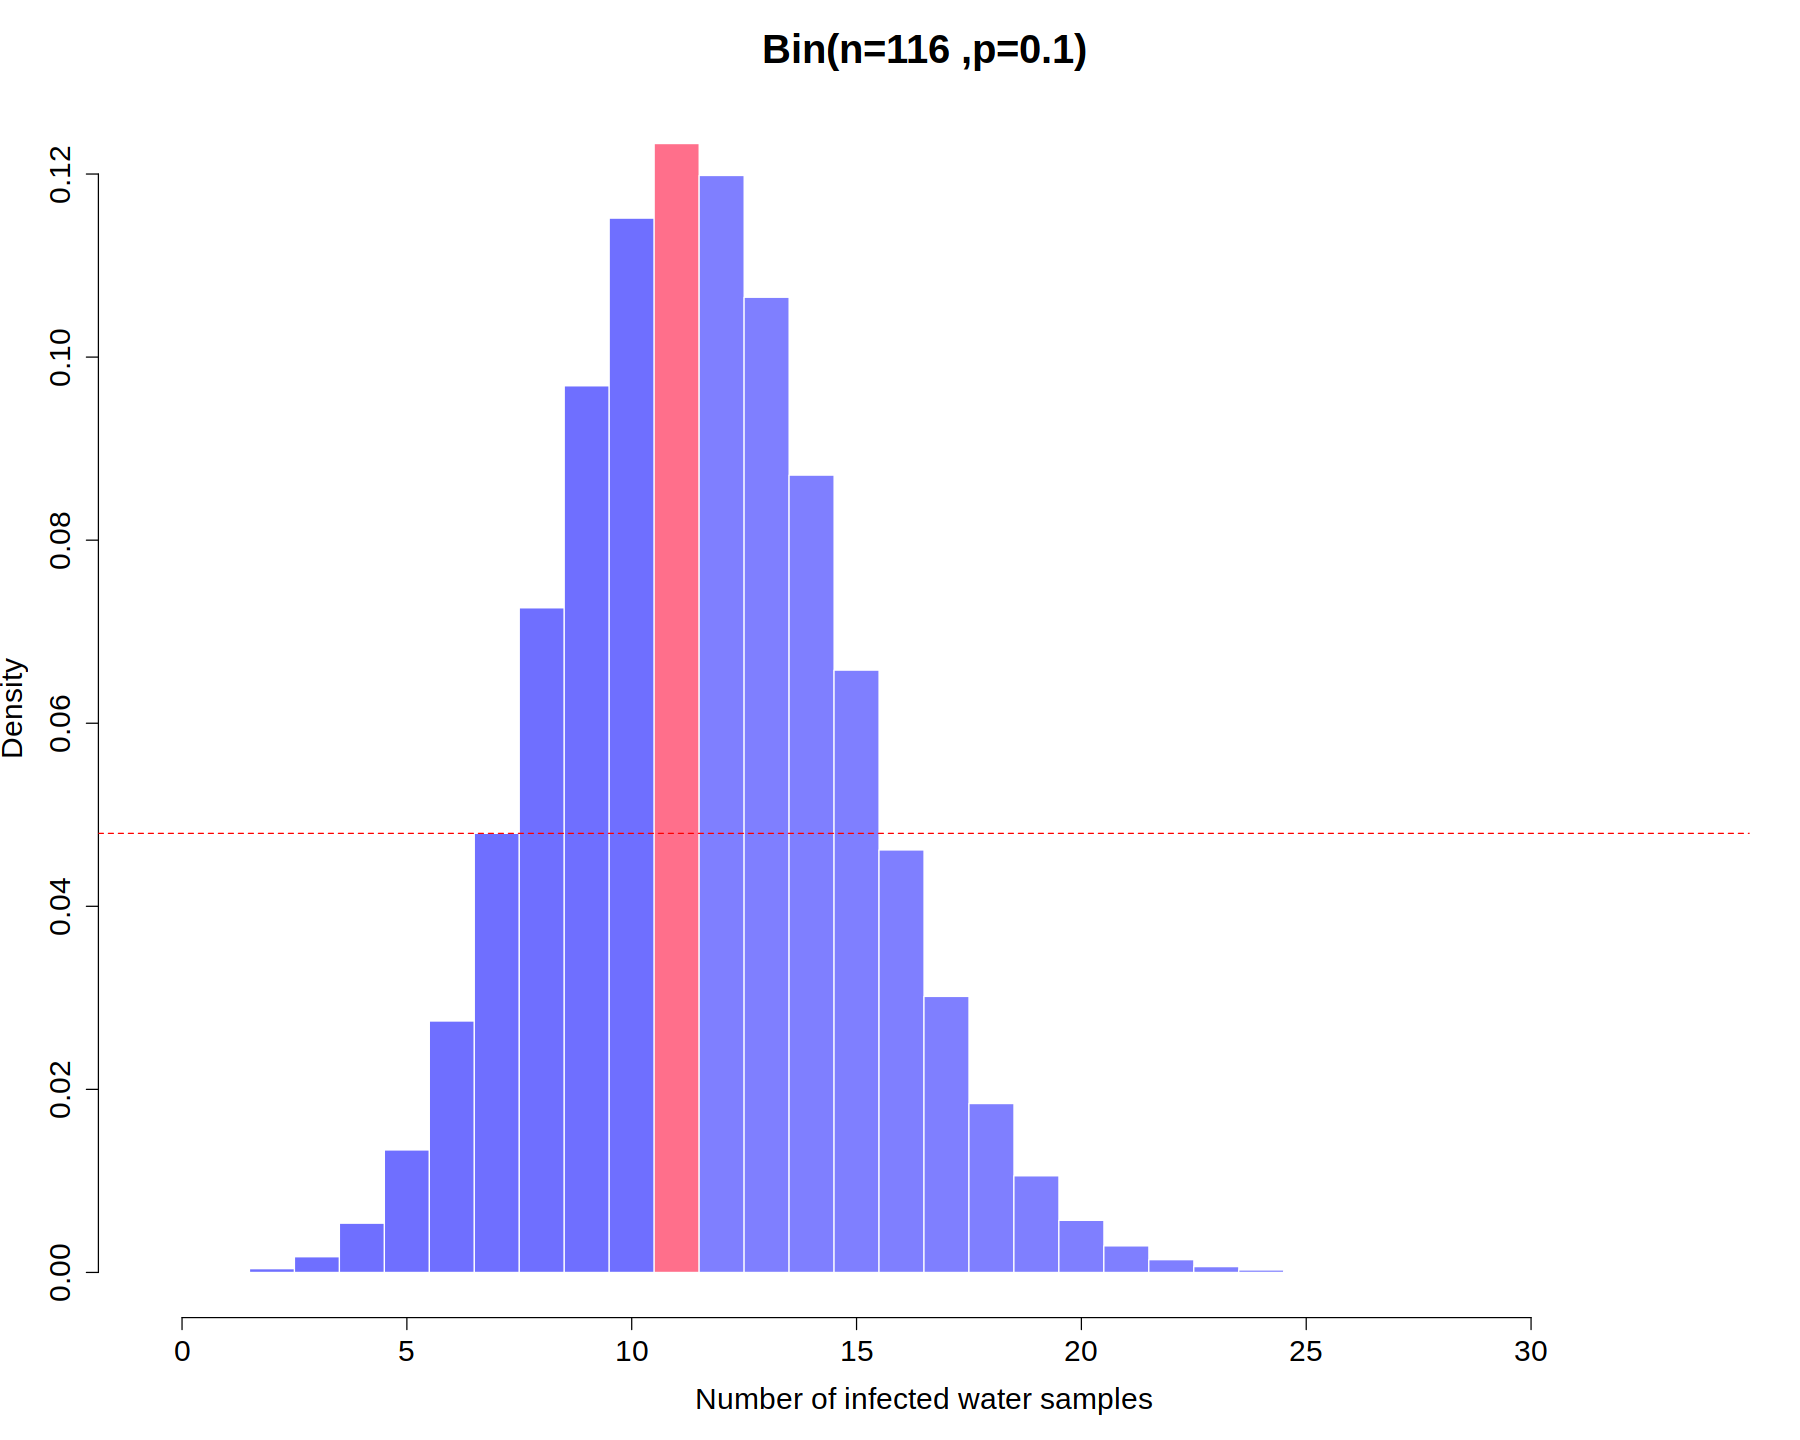

In [17]:
n <- 116 #number of samples
y <- 11   # observed positive samples

#the null distribution is the sampling distribution of y
null_dist <- rbinom(1e8, size = n, prob = p0)

# Critical values and acceptance-rejection test
alpha_d <- sum(null_dist >= 6.5 & null_dist <= 7.5) / length(null_dist) #choose the level of significance close to 5% 
y_h <- sum(null_dist >= 10.5 & null_dist <= 11.5) / length(null_dist)    # compute the density corrisponding to the bar y=11
cat("Acceptance-rejection test result:")
if (y < alpha_d ) {
  cat("\n Reject the null hypothesis")
} else {
  cat("\n Fail to reject the null hypothesis")
}

#P-value test
#approximate p-value for a two-tailed test
cat("\n P-value test result:")
p_value <- 2 * min(sum(null_dist >= 11), sum(null_dist <= 11)) / length(null_dist)
if (p_value < alpha_d ) {
  cat("\n Reject the null hypothesis")
} else {
  cat("\n Fail to reject the null hypothesis")
}

#plot
options(repr.plot.width = 15, repr.plot.height = 12)
par(cex.axis = 1.5, cex.lab=1.5, cex.main=2)
hist(null_dist,
     breaks=seq(-0.5, max(null_dist)+0.5, by=1),
     col=c(rep('#0000FF90',11), '#FF003390',rep('#0000FF80',13) ),
     border='white',
     main="Bin(n=116 ,p=0.1)",
     xlab="Number of infected water samples",
     ylab = "Density",
     xlim = c(-0.5, max(null_dist)+0.5),
     freq=FALSE
)
abline(h=alpha_d, lty=2, col="red")


#### (e) find the frequentist estimator for p

In [2]:
n_new <- 165 #number of samples
y_new <- 9      # total positive samples
cat('The frequentist estimator for the probability p of a water sample having a high bacter X level is: ', round(y_new/n_new,3))

The frequentist estimator for the probability p of a water sample having a high bacter X level is:  0.055

#### (f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

Let's assume a beta prior

The posterior mean and variance are:  0.0568 , 3e-04
The 95% credibility interval is:  [ 0.03 ; 0.1 ]

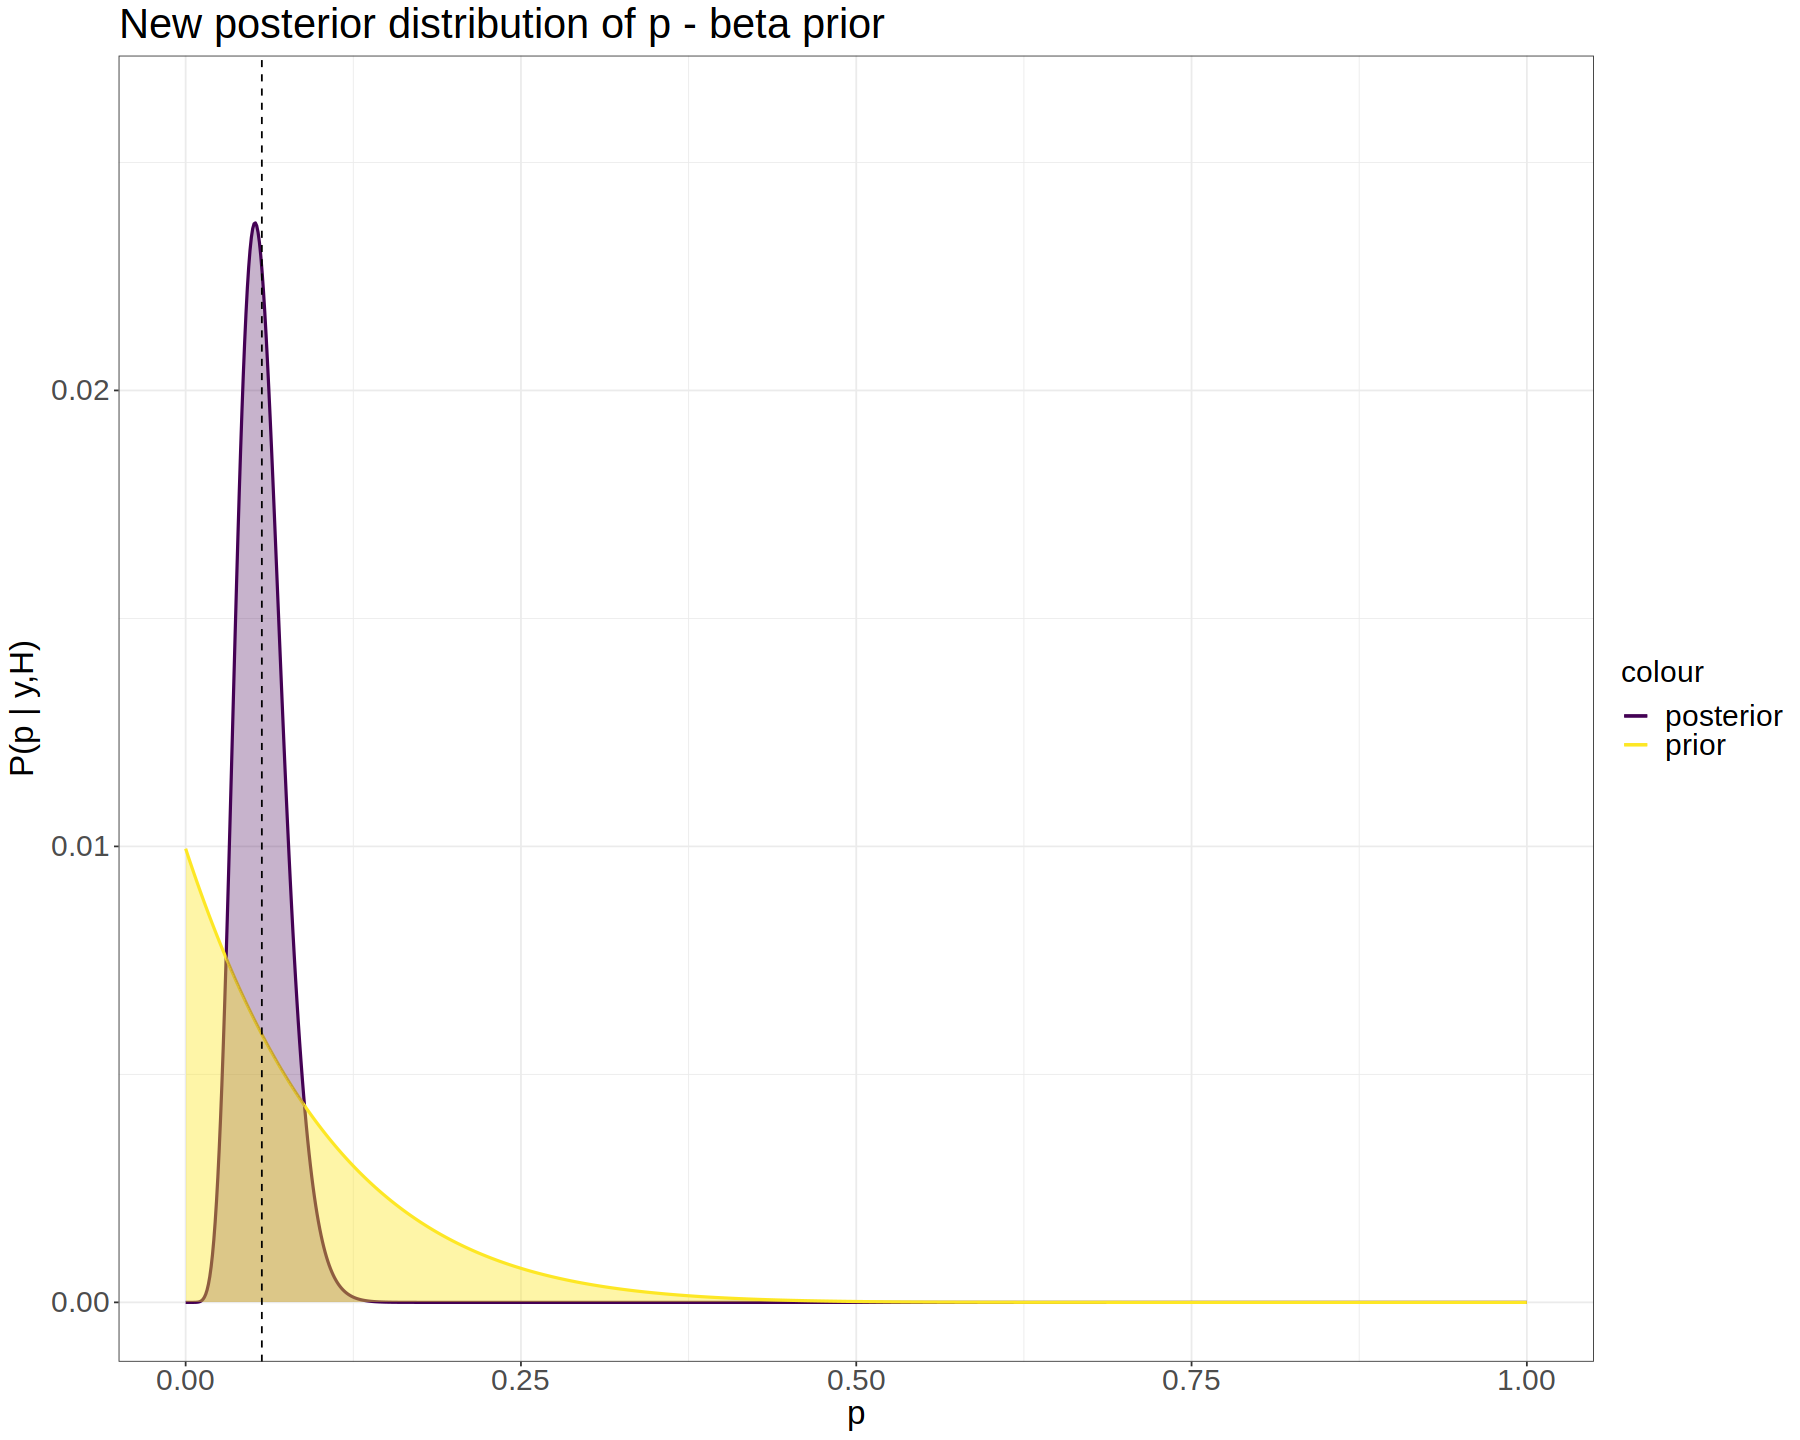

In [11]:
#Prior, likelihood, posterior previously defined
#sequence of p, alpha and beta previously defined
alpha <- 1
beta <- 10
prior_new <- beta_prior_function(p, alpha, beta)
likelihood_new  <- likelihood_function(y_new ,n_new ,p)
posterior_new  <- beta_post_function(p, alpha, beta, y_new , n_new )

#compute the bayesian estimator for p
beta_mean_new <- (alpha+y_new) /( alpha + beta+n_new)
beta_var_new <- ((alpha+y_new) /( alpha + beta+n_new)**2)*(beta+n_new-y_new)/(alpha+beta+n_new+1)

#95% credibility interval
p_CI_new <- qbeta(c(0.025,0.975),  alpha+y_new, beta+n_new-y_new)

#results
cat("The posterior mean and variance are: ", round(beta_mean_new,4), ',', round(beta_var_new,4))
cat("\nThe 95% credibility interval is: ", '[',round(p_CI_new[1],2), ';',round(p_CI_new[2],2),']')

#Plot
options(repr.plot.width = 15, repr.plot.height = 12)
df3.5 <- data.frame(x = p, y1 = posterior_new , y2=prior_new ) 
    ggplot(data =df3.5, aes(x)) + 
    geom_line(aes(y = y1, color = "posterior"), linewidth = 0.9) +
    geom_line(aes(y = y2, color = "prior"), linewidth = 0.9) +
    geom_area(aes(y = y1, fill = "posterior"), alpha = 0.3) +
    geom_area(aes(y = y2, fill = "prior"), alpha = 0.4) +
    geom_vline(xintercept=beta_mean_new, lty=2)+
    theme_bw()+
    ylim(0, 1.1*max(posterior_new)) +
    xlim(0, 1) +
    xlab("p") +
    ylab(expression(paste(P, "(p | y,H)"))) +
    scale_color_viridis(discrete = TRUE, option = "D")+
    scale_fill_viridis(discrete = TRUE) +
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    guides(fill = 'none') +
    ggtitle("New posterior distribution of p - beta prior")

I assume now the posterior probability of the older measurement as the prior for the new one.

The posterior mean and variance are:  0.0557 , 2e-04
The 95% credibility interval is:  [ 0.03 ; 0.08 ]

Warning message:
“Removed 700 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 700 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 700 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 700 rows containing missing values (`geom_line()`).”


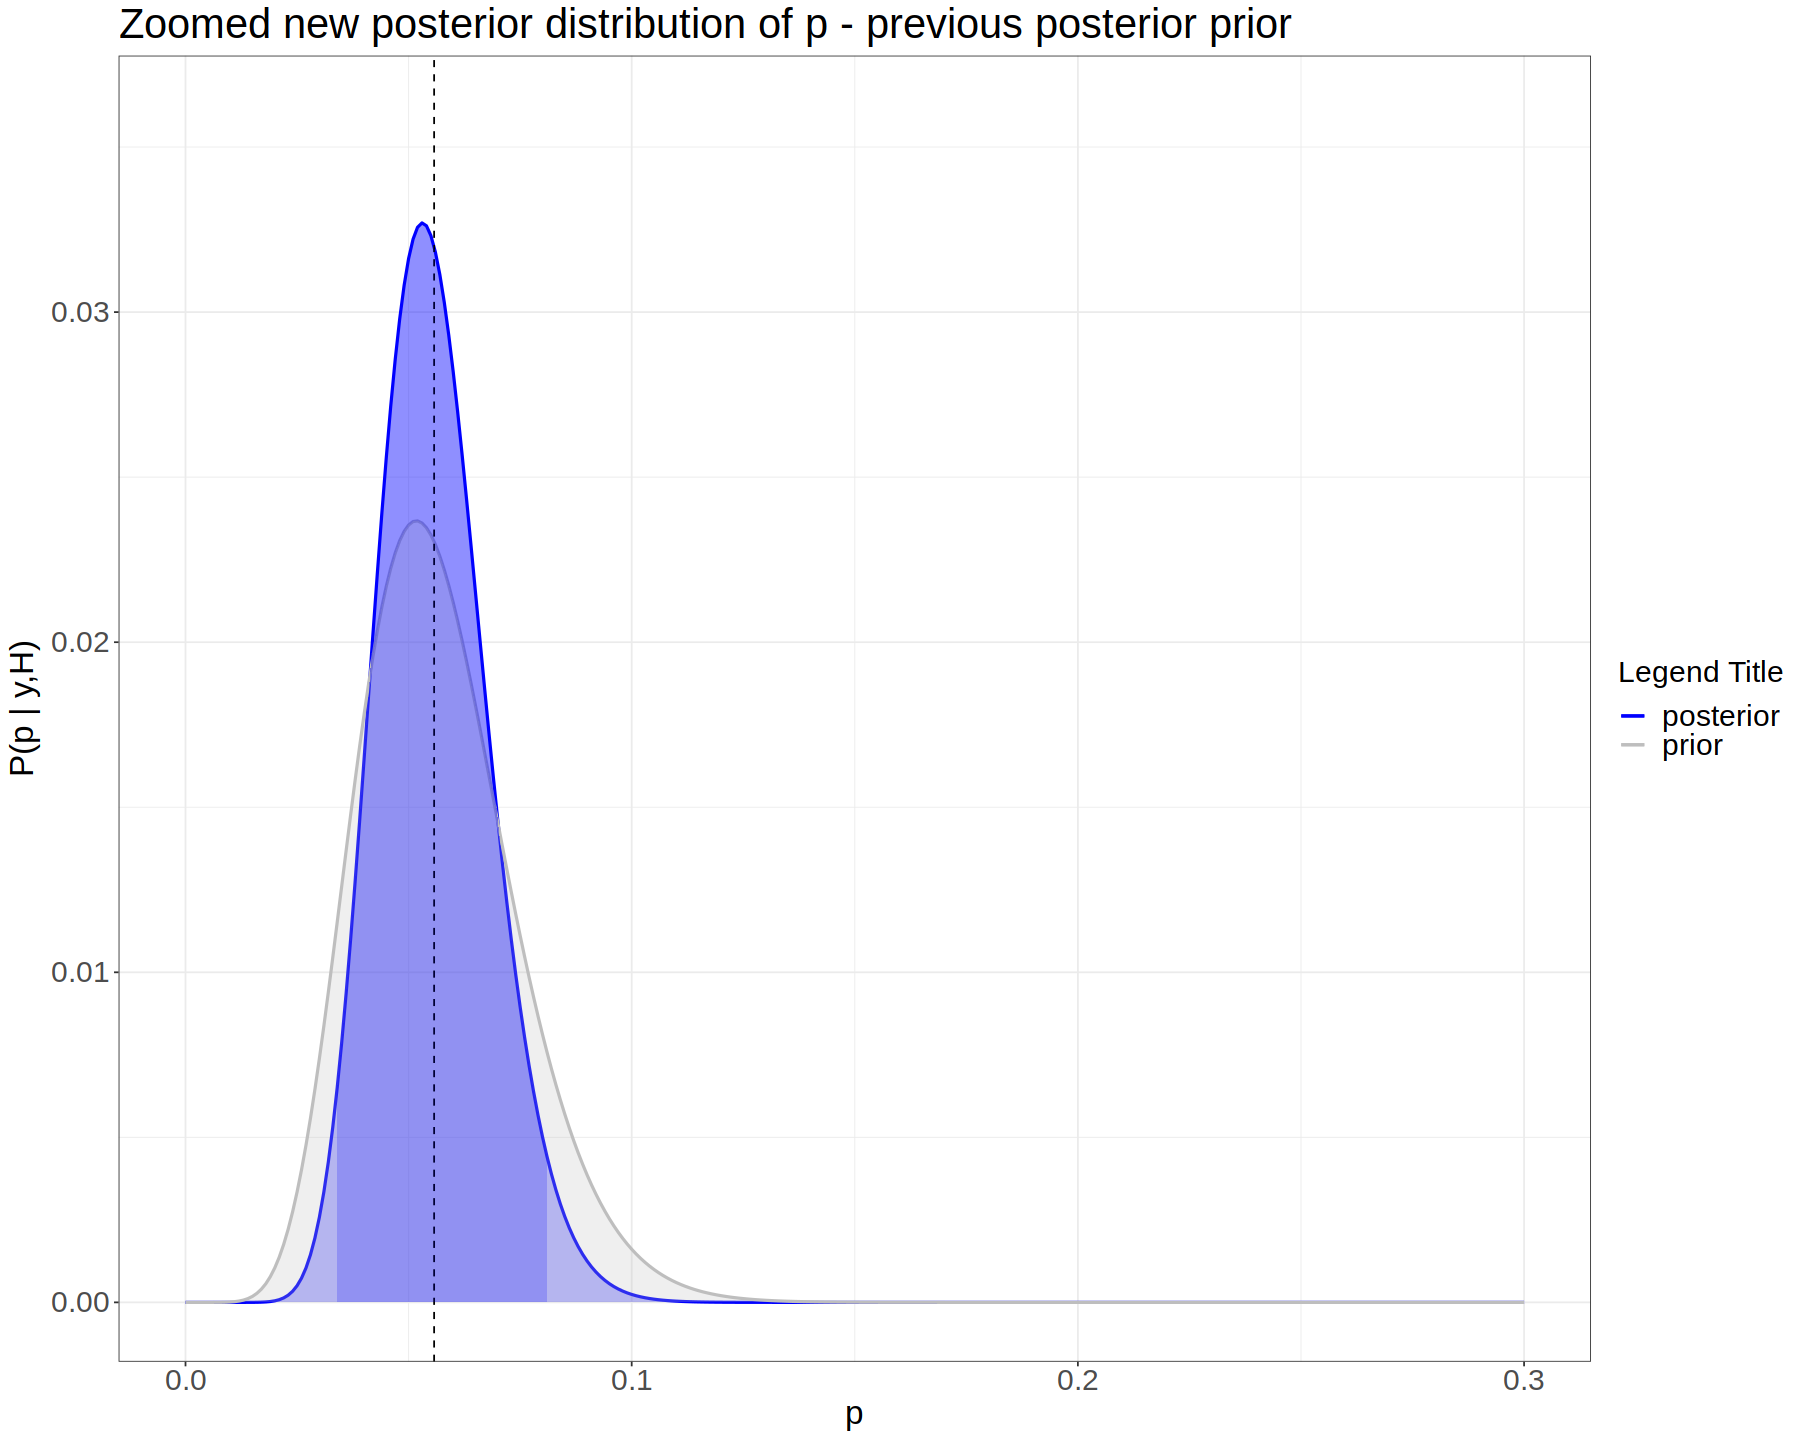

In [12]:
prior_new2 <- posterior_new #posterior_new -> posterior probability of the older measurement 
likelihood_new2  <- likelihood_function(y_new ,n_new ,p) #same likelihood as before
posterior_new2_nn  <- prior_new2*likelihood_new2 #post = likelihood x prior
posterior_new2 <- posterior_new2_nn/sum(posterior_new2_nn)  #normalized final posterior

#compute the bayesian estimator for p
mean_new2 <- sum(p*posterior_new2)
var_new2 <-  sum(p*p*posterior_new2)-mean_new2**2  #equivalent calculation

#95% credibility interval
post_new2_cum <- cumsum(posterior_new2)/sum(posterior_new2)
lower_CI_new2<- min(p[post_new2_cum >= 0.025])
upper_CI_new2 <- max(p[post_new2_cum <= 0.975])

#results
cat("The posterior mean and variance are: ", round(mean_new2,4), ',', round(var_new2,4))
cat("\nThe 95% credibility interval is: ", '[',round(lower_CI_new2,2), ';',round(upper_CI_new2,2),']')


#Plot
options(repr.plot.width = 15, repr.plot.height = 12)
df3.5b <- data.frame(x = p, y1 = posterior_new2 , y2=prior_new2 ) 
    ggplot(data =df3.5b, aes(x)) + 
    geom_line(aes(y = y1, color = "posterior"), linewidth = 0.9) +
    geom_line(aes(y = y2, color = "prior"), linewidth = 0.9) +
    geom_area(aes(y = y1, fill = "posterior"), alpha = 0.3) +
    geom_area(aes(y = y2, fill = "prior"), alpha = 0.24) +
    geom_vline(xintercept=mean_new2, lty=2)+
 geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.2, 
              data = subset(data.frame(x = p, y = posterior_new2), x >= lower_CI_new2 & x <= upper_CI_new2 )) +
    theme_bw()+
    ylim(0, 1.1*max(posterior_new2)) +
    xlim(0, 0.3) +
    xlab("p") +
    ylab(expression(paste(P, "(p | y,H)"))) +
    scale_fill_manual(values = c("posterior" = "blue", "prior" = "grey"),name = "Legend Title") +
    scale_color_manual(values = c("posterior" = "blue", "prior" = "grey"),name = "Legend Title") +
    theme(plot.title = element_text(size = 25), axis.title = element_text(size = 20), axis.text = element_text(size = 18), legend.text = element_text(size = 18),
    legend.title = element_text(size = 18))+
    guides(fill = 'none') +
    ggtitle("Zoomed new posterior distribution of p - previous posterior prior")

#### (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
The Bayesian estimator for parameter p was computed in the previous sections (point (f)) using the posterior mean and variance. Here, the results are summarized in a dataframe and visualized in a plot. The plot displays the credibility interval (C.I.) along with the Bayesian estimator for p, showing the variations across different methods.

Method,Mean,Std,Credibility_Interval
<chr>,<dbl>,<dbl>,<chr>
Previous knowledge method,0.0557,2e-04,"[0.03, 0.08]"
Beta Prior Method,0.0568,3e-04,"[0.03, 0.1]"


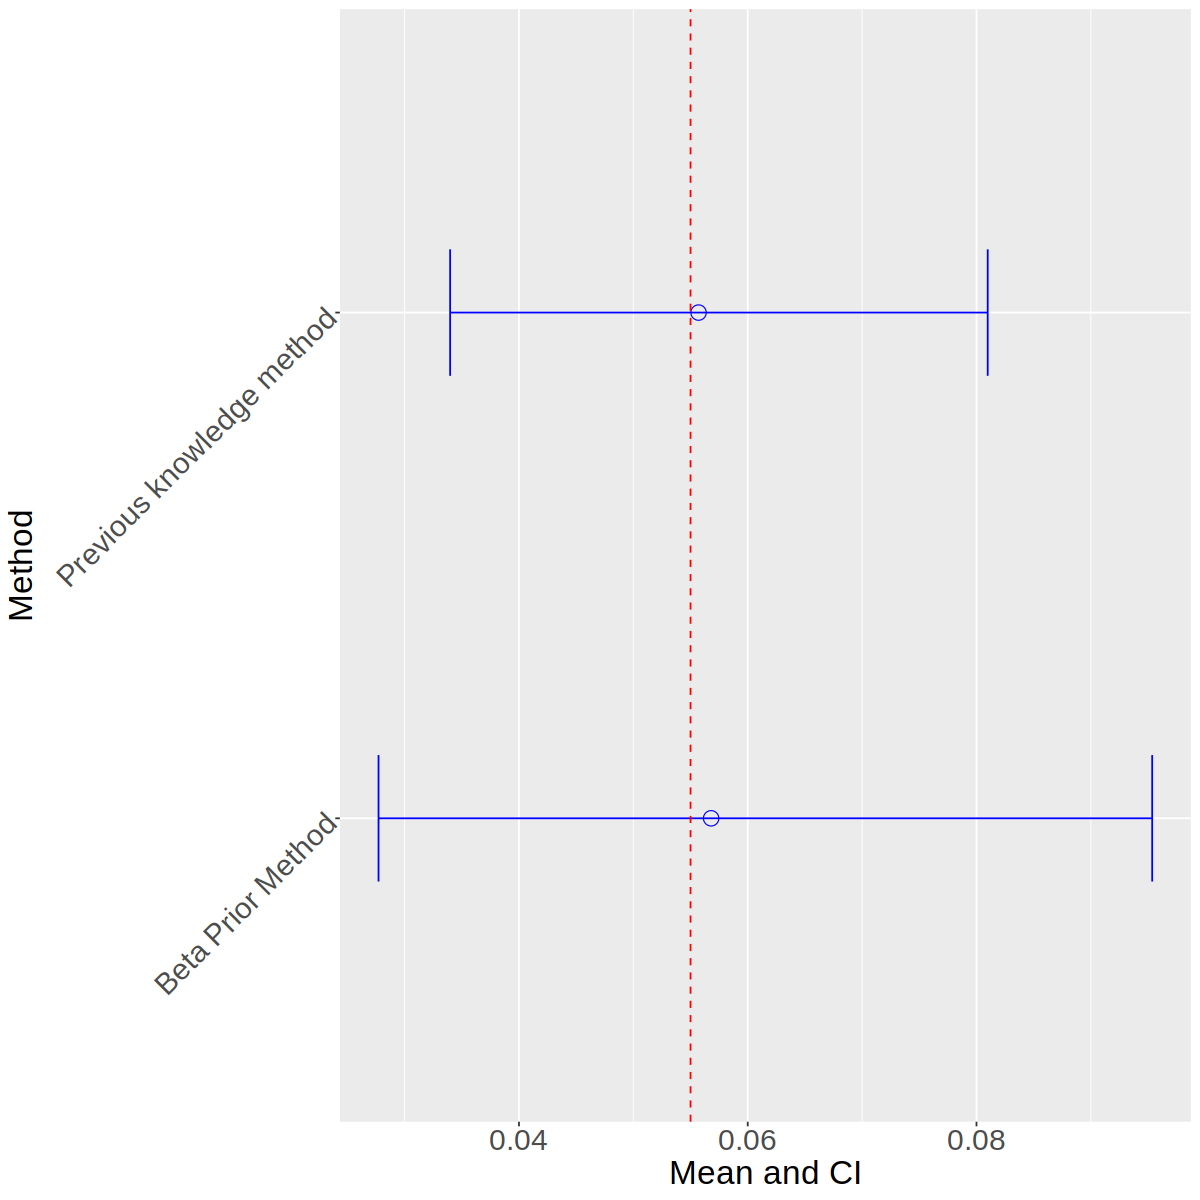

In [13]:
# Create the data frame
df <- data.frame(Method = c("Previous knowledge method", "Beta Prior Method"),
                 Mean = c(round(mean_new2,4),round( beta_mean_new,4)),
                 Std = c(round(var_new2,4),round( beta_var_new,4)),   
                 Credibility_Interval = c(c(paste("[", round(lower_CI_new2, 2), ", ", round(upper_CI_new2, 2), "]", sep = "")),
                                                           c(paste("[", round(p_CI_new[1], 2), ", ", round(p_CI_new[2], 2), "]", sep = ""))
                                                           ),
                sx = c(mean_new2-lower_CI_new2, beta_mean_new-p_CI_new[1]),
                dx = c(upper_CI_new2-mean_new2, p_CI_new[2]-beta_mean_new)
                )
df1 <- df[,c('Method','Mean','Std', 'Credibility_Interval')]
df1

#Plot mean and CI vs the method
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df, aes(x=Method, y=Mean)) + 
  geom_point(aes(y = Mean), shape = "circle open", size=4, color="blue") +
  geom_errorbar(aes(x=Method, ymin=Mean-sx, ymax=Mean+dx), color="blue", width=0.25)+
  coord_flip() +  
  geom_hline(yintercept=0.055, lty=2, col='red')+
  labs(x = "Method", y = "Mean and CI") +
  scale_fill_manual(values = c("green", "red")) +
  #theme_classic()+
  theme(axis.text.x = element_text(size = 18,angle = 0), axis.text.y = element_text(size = 18,angle = 45), axis.title = element_text(size = 20))

#### (d) test the hypotesis H 0 : p = 0.1 versus H 1 : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach) <br>
Bayesian approach <br>
In the Bayesian approach, I conduct a two-sided hypothesis test using the two pre-computed posterior distributions and a significance level of 5%. I calculated a 95% credibility interval for the parameter p, representing a range of parameter values with a posterior probability of 95%. The value of p is observed to be in the rejection region because it dp not lies inside the $(1- \alpha) \times 100$ interval, so we reject the null hypotesis.

In [14]:
# Calculate the critical values using the previously calculated 95% CI
p0 <- 0.1
alpha <- 0.05
lower_bound_d1 <- p_CI_new[1] #using beta prior
upper_bound_d1 <- p_CI_new[2]

lower_bound_d2 <- lower_CI_new2 #using the previous posterior as a prior
upper_bound_d2 <- upper_CI_new2

# Perform the two sideds hypothesis test
cat("\n Result of  the two sideds hypothesis test assuming a beta prior: ")
if (p0 < lower_bound_d1 || p0 > upper_bound_d1) {
  cat("\n Reject the null hypothesis\n")
} else {
  cat("\n Fail to reject the null hypothesis\n")
}

cat("\n Result of  the two sideds hypothesis test assuming the previous posterior as a prior: ")
if (p0 < lower_bound_d2 || p0 > upper_bound_d2) {
  cat("\n Reject the null hypothesis")
} else {
  cat("\n Fail to reject the null hypothesis")
}



 Result of  the two sideds hypothesis test assuming a beta prior: 
 Reject the null hypothesis

 Result of  the two sideds hypothesis test assuming the previous posterior as a prior: 
 Reject the null hypothesis

Warning message:
“Removed 700 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 700 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 700 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 700 rows containing missing values (`geom_line()`).”


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


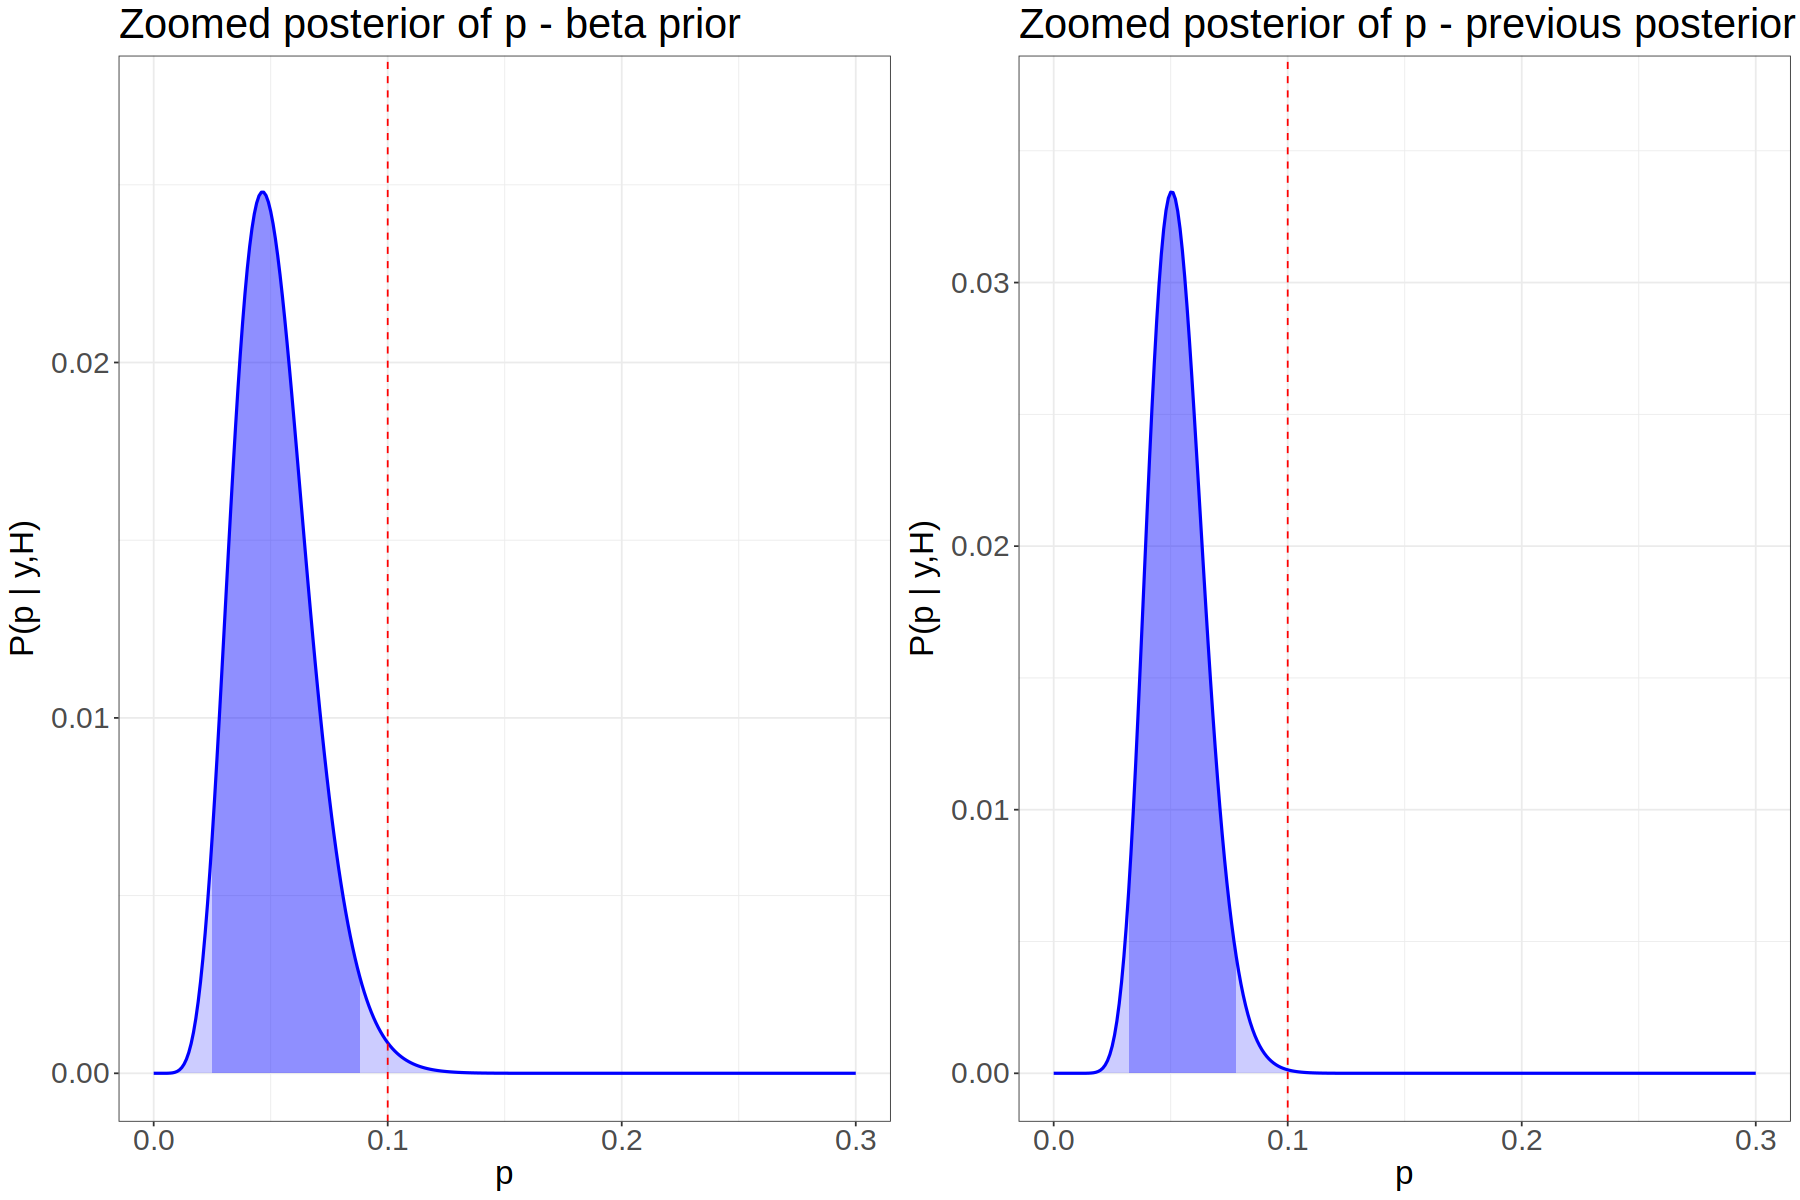

In [23]:
library(gridExtra)

#visualize the result of the bayesian hypotesis testing in both
#  - beta prior
#  - posterior as a prior 
#methods.

options(repr.plot.width = 15, repr.plot.height = 10)
df3.8 <- data.frame(x = p, y1 = posterior_new2, y2 = posterior_new) 
g1 <-    ggplot(data =df3.8, aes(x)) + 
              geom_line(aes(y = y2, color = "posterior"), linewidth = 0.9) +
              geom_area(aes(y = y2, fill = "posterior"), alpha = 0.2) +
              geom_vline(xintercept = p0, lty = 2, color = 'red') +
              geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.3, 
                          data = subset(data.frame(x = p, y = posterior_new), x >= lower_bound_d1 & x <= upper_bound_d1)) +
              theme_bw() +
              ylim(0, 1.1 * max(posterior_new)) +
              xlim(0, 0.3) +
              xlab("p") +
              ylab(expression(paste(P, "(p | y,H)"))) +
              scale_fill_manual(values = c("posterior" = "blue")) +
              scale_color_manual(values = c("posterior" = "blue")) +
              theme(plot.title = element_text(size = 25),
                    axis.title = element_text(size = 20),
                    axis.text = element_text(size = 18),
                    legend.position = "none",  # Remove the legend
                    legend.text = element_text(size = 18),
                    legend.title = element_text(size = 18)) +
              ggtitle("Zoomed posterior of p - beta prior")

g2 <-     ggplot(data = df3.8, aes(x)) + 
              geom_line(aes(y = y1, color = "posterior"), linewidth = 0.9) +
              geom_area(aes(y = y1, fill = "posterior"), alpha = 0.2) +
              geom_vline(xintercept = p0, lty = 2, color = 'red') +
              geom_ribbon(aes(ymax = y, ymin = 0), fill = "blue", alpha = 0.3, 
                          data = subset(data.frame(x = p, y = posterior_new2), x >= lower_bound_d2 & x <= upper_bound_d2)) +
              theme_bw() +
              ylim(0, 1.1 * max(posterior_new2)) +
              xlim(0, 0.3) +
              xlab("p") +
              ylab(expression(paste(P, "(p | y,H)"))) +
              scale_fill_manual(values = c("posterior" = "blue")) +
              scale_color_manual(values = c("posterior" = "blue")) +
              theme(plot.title = element_text(size = 25),
                    axis.title = element_text(size = 20),
                    axis.text = element_text(size = 18),
                    legend.position = "none",  # Remove the legend
                    legend.text = element_text(size = 18),
                    legend.title = element_text(size = 18)) +
              ggtitle("Zoomed posterior of p - previous posterior prior")

# Arrange the plots side by side
combined_plots <- grid.arrange(g1, g2, nrow = 1, ncol = 2)

# Display the combined plots
print(combined_plots)


Frequentist approach <br>


In [ ]:
# Critical values and acceptance-rejection test
alpha_h <- sum(null_dist >= 6.5 & null_dist <= 7.5) / length(null_dist) #choose the level of significance close to 5% 
y_h <- sum(null_dist >= 10.5 & null_dist <= 11.5) / length(null_dist)    # compute the density corrisponding to the bar y=11
cat("Acceptance-rejection test result:")
if (y < alpha_d ) {
  cat("\n Reject the null hypothesis")
} else {
  cat("\n Fail to reject the null hypothesis")
}

#P-value test
#approximate p-value for a two-tailed test
cat("\n P-value test result:")
p_value <- 2 * min(sum(null_dist >= 11), sum(null_dist <= 11)) / length(null_dist)
if (p_value < alpha_d ) {
  cat("\n Reject the null hypothesis")
} else {
  cat("\n Fail to reject the null hypothesis")
}

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): oggetto 'alpha_d' non trovato


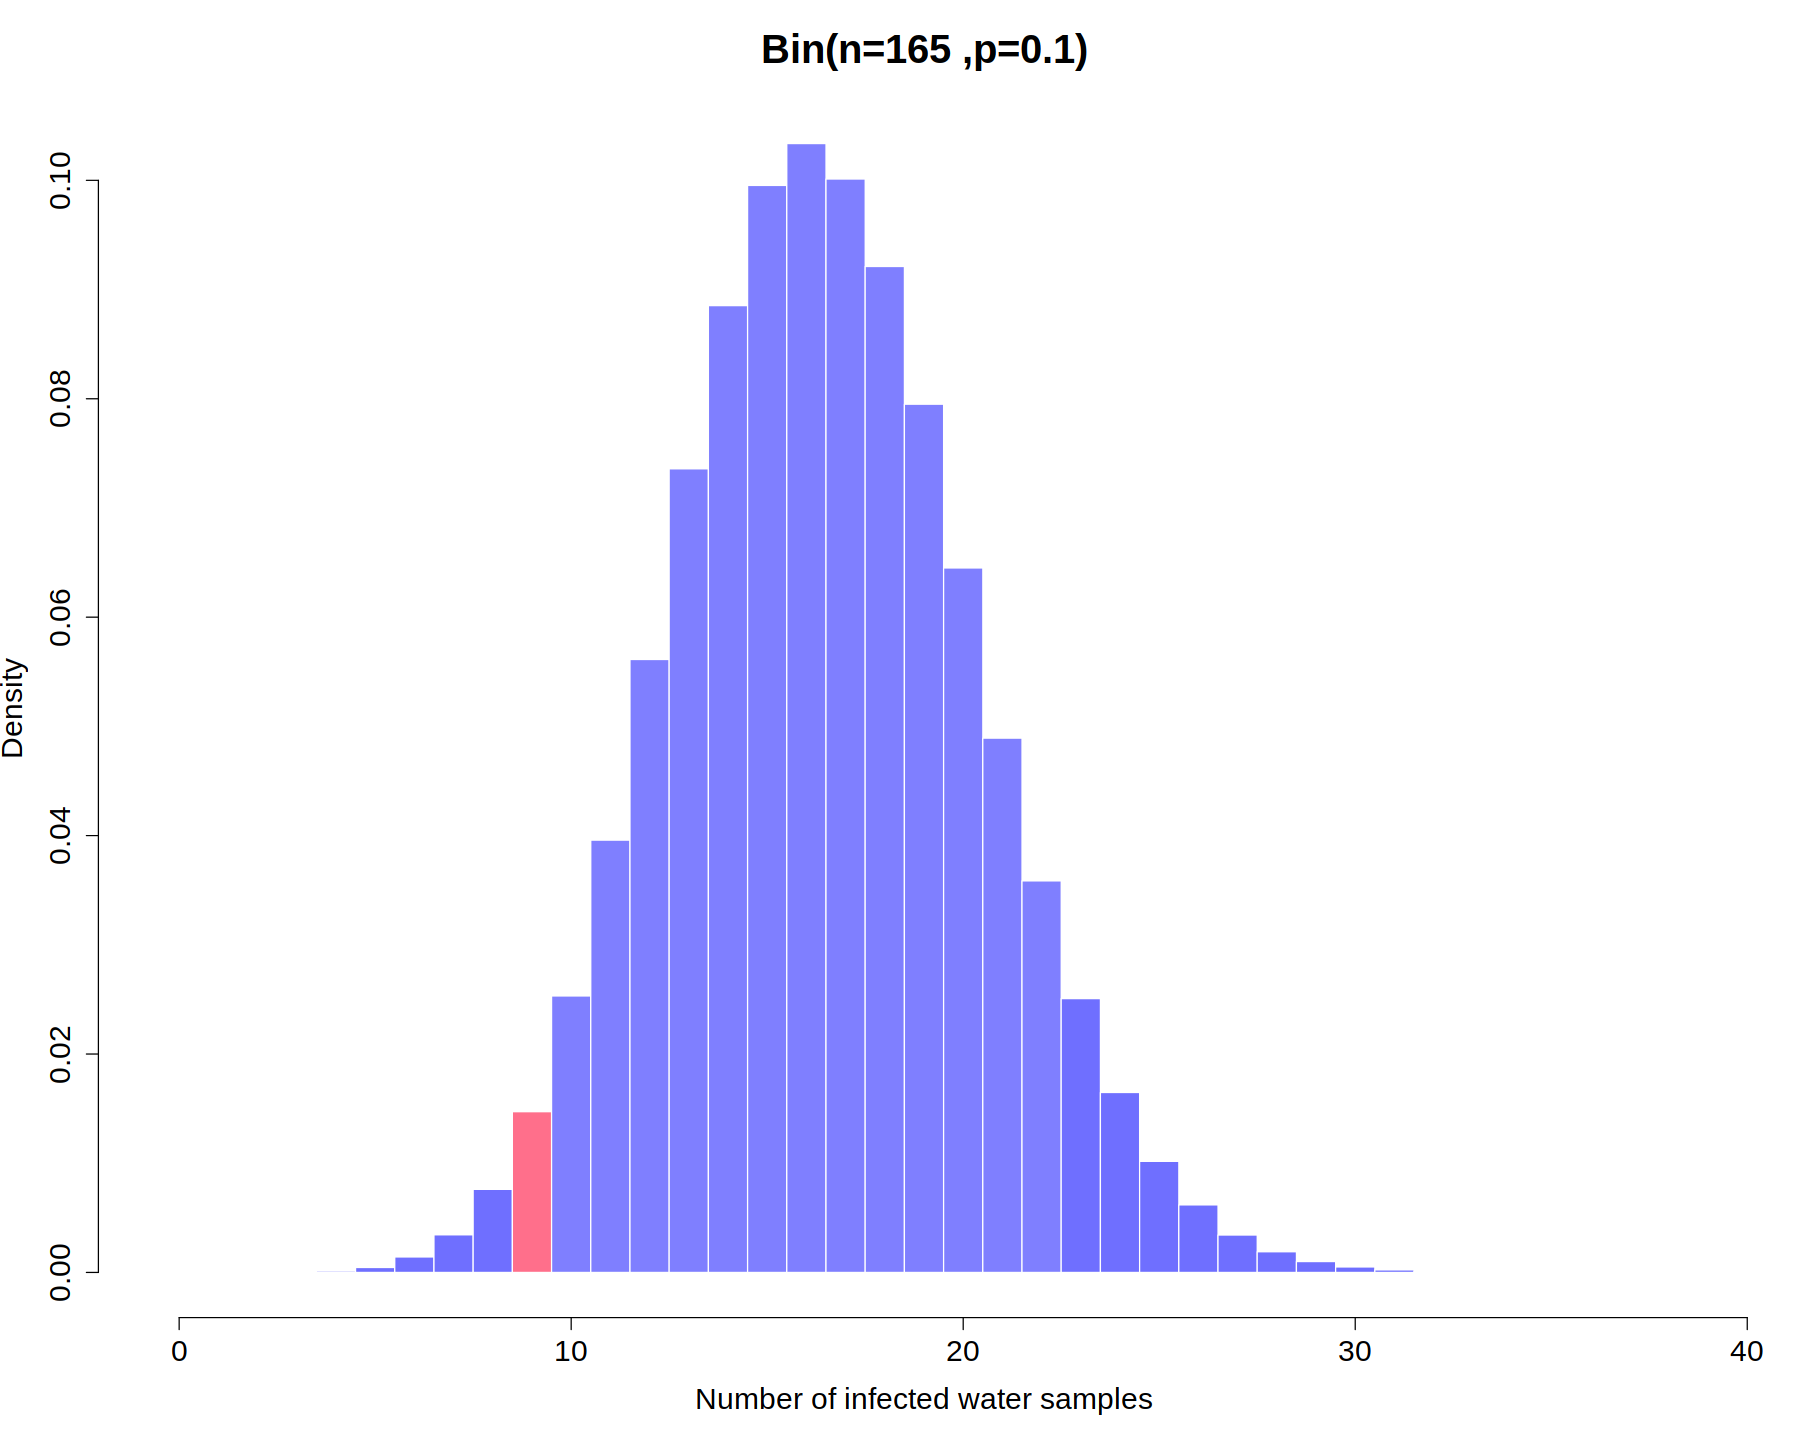

In [20]:
n_new <- 165 #number of samples
y_new <- 9      # total positive samples

#the null distribution is the sampling distribution of y
null_dist2 <- rbinom(1e6, size = n_new, prob = p0)

#plot
options(repr.plot.width = 15, repr.plot.height = 12)
par(cex.axis = 1.5, cex.lab=1.5, cex.main=2)
hist(null_dist2,
     breaks=seq(-0.5, max(null_dist2)+0.5, by=1),
     col=c(rep('#0000FF90',9), '#FF003390',rep('#0000FF80',13) ),
     border='white',
     main="Bin(n=165 ,p=0.1)",
     xlab="Number of infected water samples",
     ylab = "Density",
     xlim = c(-0.5, max(null_dist2)+0.5),
     freq=FALSE
)
abline(h=alpha_d, lty=2, col="red")
